# NeurIPS Main Results — Random and Spatial Split

**Purpose:** Scrapes final NeurIPS results for random and spatial split evaluations from Weights & Biases. This notebook contains all computed performance metrics.

**Associated Tables:** Table 1, Table 2  
**Associated Figures:** Fig. 5B

**Author:** Alexander Ratzan   
**Project:** Predicting Functional Brain Connectivity with Context-Aware Deep Neural Networks (NeurIPS 2025)

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-11-20 13:05:07.301750: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 13:05:08.258311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 13:05:09.045010: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 13:05:09.046366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruc

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run
from sim.wandb_scrape import *

Resorting genes by reference genome order


## Wandb API Query <a id="sims"></a>

Search and plot Random

In [123]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['cge', 'gaussian_kernel', 'exponential_decay',
          'bilinear_CM', 'pls_bilineardecoder', 'bilinear_lowrank',
          'dynamic_mlp', 'shared_transformer', 'shared_transformer_cls']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'cge': ['transcriptome_PCA'],
    'gaussian_kernel': ['euclidean'],
    'exponential_decay': ['euclidean'],
    'bilinear_CM': ['transcriptome', 'transcriptome_PCA'],
    'pls_bilineardecoder': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome']
}

# Time ranges for true models
time_ranges_true = {
    'default': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
    'model_specific': {
        'cge': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'gaussian_kernel': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'exponential_decay': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'bilinear_CM': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'pls_bilineardecoder': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        # Reran for validation
        'bilinear_lowrank': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': days_ago_from_date('2025-10-13')},
        'dynamic_mlp': {'within_last': days_ago_from_date('2025-10-08'), 'before_last': days_ago_from_date('2025-10-17')},
        'shared_transformer': {'within_last': days_ago_from_date('2025-10-11'), 'before_last': days_ago_from_date('2025-10-16')},
        'shared_transformer_cls': {'within_last': days_ago_from_date('2025-10-11'), 'before_last': days_ago_from_date('2025-10-16')}
    }
}

# Time ranges for null models
time_ranges_spin = {
    'default': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
    'model_specific': {
        'cge': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'gaussian_kernel': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'exponential_decay': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'bilinear_CM': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'pls_bilineardecoder': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        # Reran for validation
        'bilinear_lowrank': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': 0},
        'dynamic_mlp': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'shared_transformer': {'within_last': days_ago_from_date('2025-10-13'), 'before_last': 0},
        'shared_transformer_cls': {'within_last': days_ago_from_date('2025-10-13'), 'before_last': 0},
    }
}

cv_type = 'random'
null_model = 'none'

# Store summary DataFrames
summary_dict_random = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random, time_ranges=time_ranges_true)

cv_type = 'random'
null_model = 'spin'

# Store summary DataFrames
summary_dict_random_spin = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, time_ranges=time_ranges_spin)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=cge, cv_type=random, null_model=none, feature_type=transcriptome_PCA


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


! cge with transcriptome_PCA: Unexpected error: HTTPSConnectionPool(host='api.wandb.ai', port=443): Read timed out. (read timeout=19)
🔍 Fetching runs for: model=gaussian_kernel, cv_type=random, null_model=none, feature_type=euclidean
✓ gaussian_kernel with euclidean: Successfully found 40 runs
🔍 Fetching runs for: model=exponential_decay, cv_type=random, null_model=none, feature_type=euclidean
✓ exponential_decay with euclidean: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_CM, cv_type=random, null_model=none, feature_type=transcriptome
✓ bilinear_CM: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_CM, cv_type=random, null_model=none, feature_type=transcriptome_PCA
✓ bilinear_CM_PCA: Successfully found 40 runs
🔍 Fetching runs for: model=pls_bilineardecoder, cv_type=random, null_model=none, feature_type=transcriptome
✓ pls_bilineardecoder with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_lowrank, cv_type=random, null_model

In [35]:
summary_dict_random

{'cge':       train_geodesic_distance  train_inter_hemi_r  \
 mean                22.901140            0.198661   
 std                  0.665635            0.011159   
 
       train_inter_network_Cerebellum_r  train_inter_network_Cont_r  \
 mean                          0.235094                    0.249401   
 std                           0.032808                    0.022346   
 
       train_inter_network_Default_r  train_inter_network_DorsAttn_r  \
 mean                       0.242524                        0.204553   
 std                        0.020347                        0.028832   
 
       train_inter_network_Limbic_r  train_inter_network_SalVentAttn_r  \
 mean                      0.245641                           0.261587   
 std                       0.021493                           0.022129   
 
       train_inter_network_SomMot_r  train_inter_network_Subcortical_r  ...  \
 mean                      0.304388                           0.234153  ...   
 std          

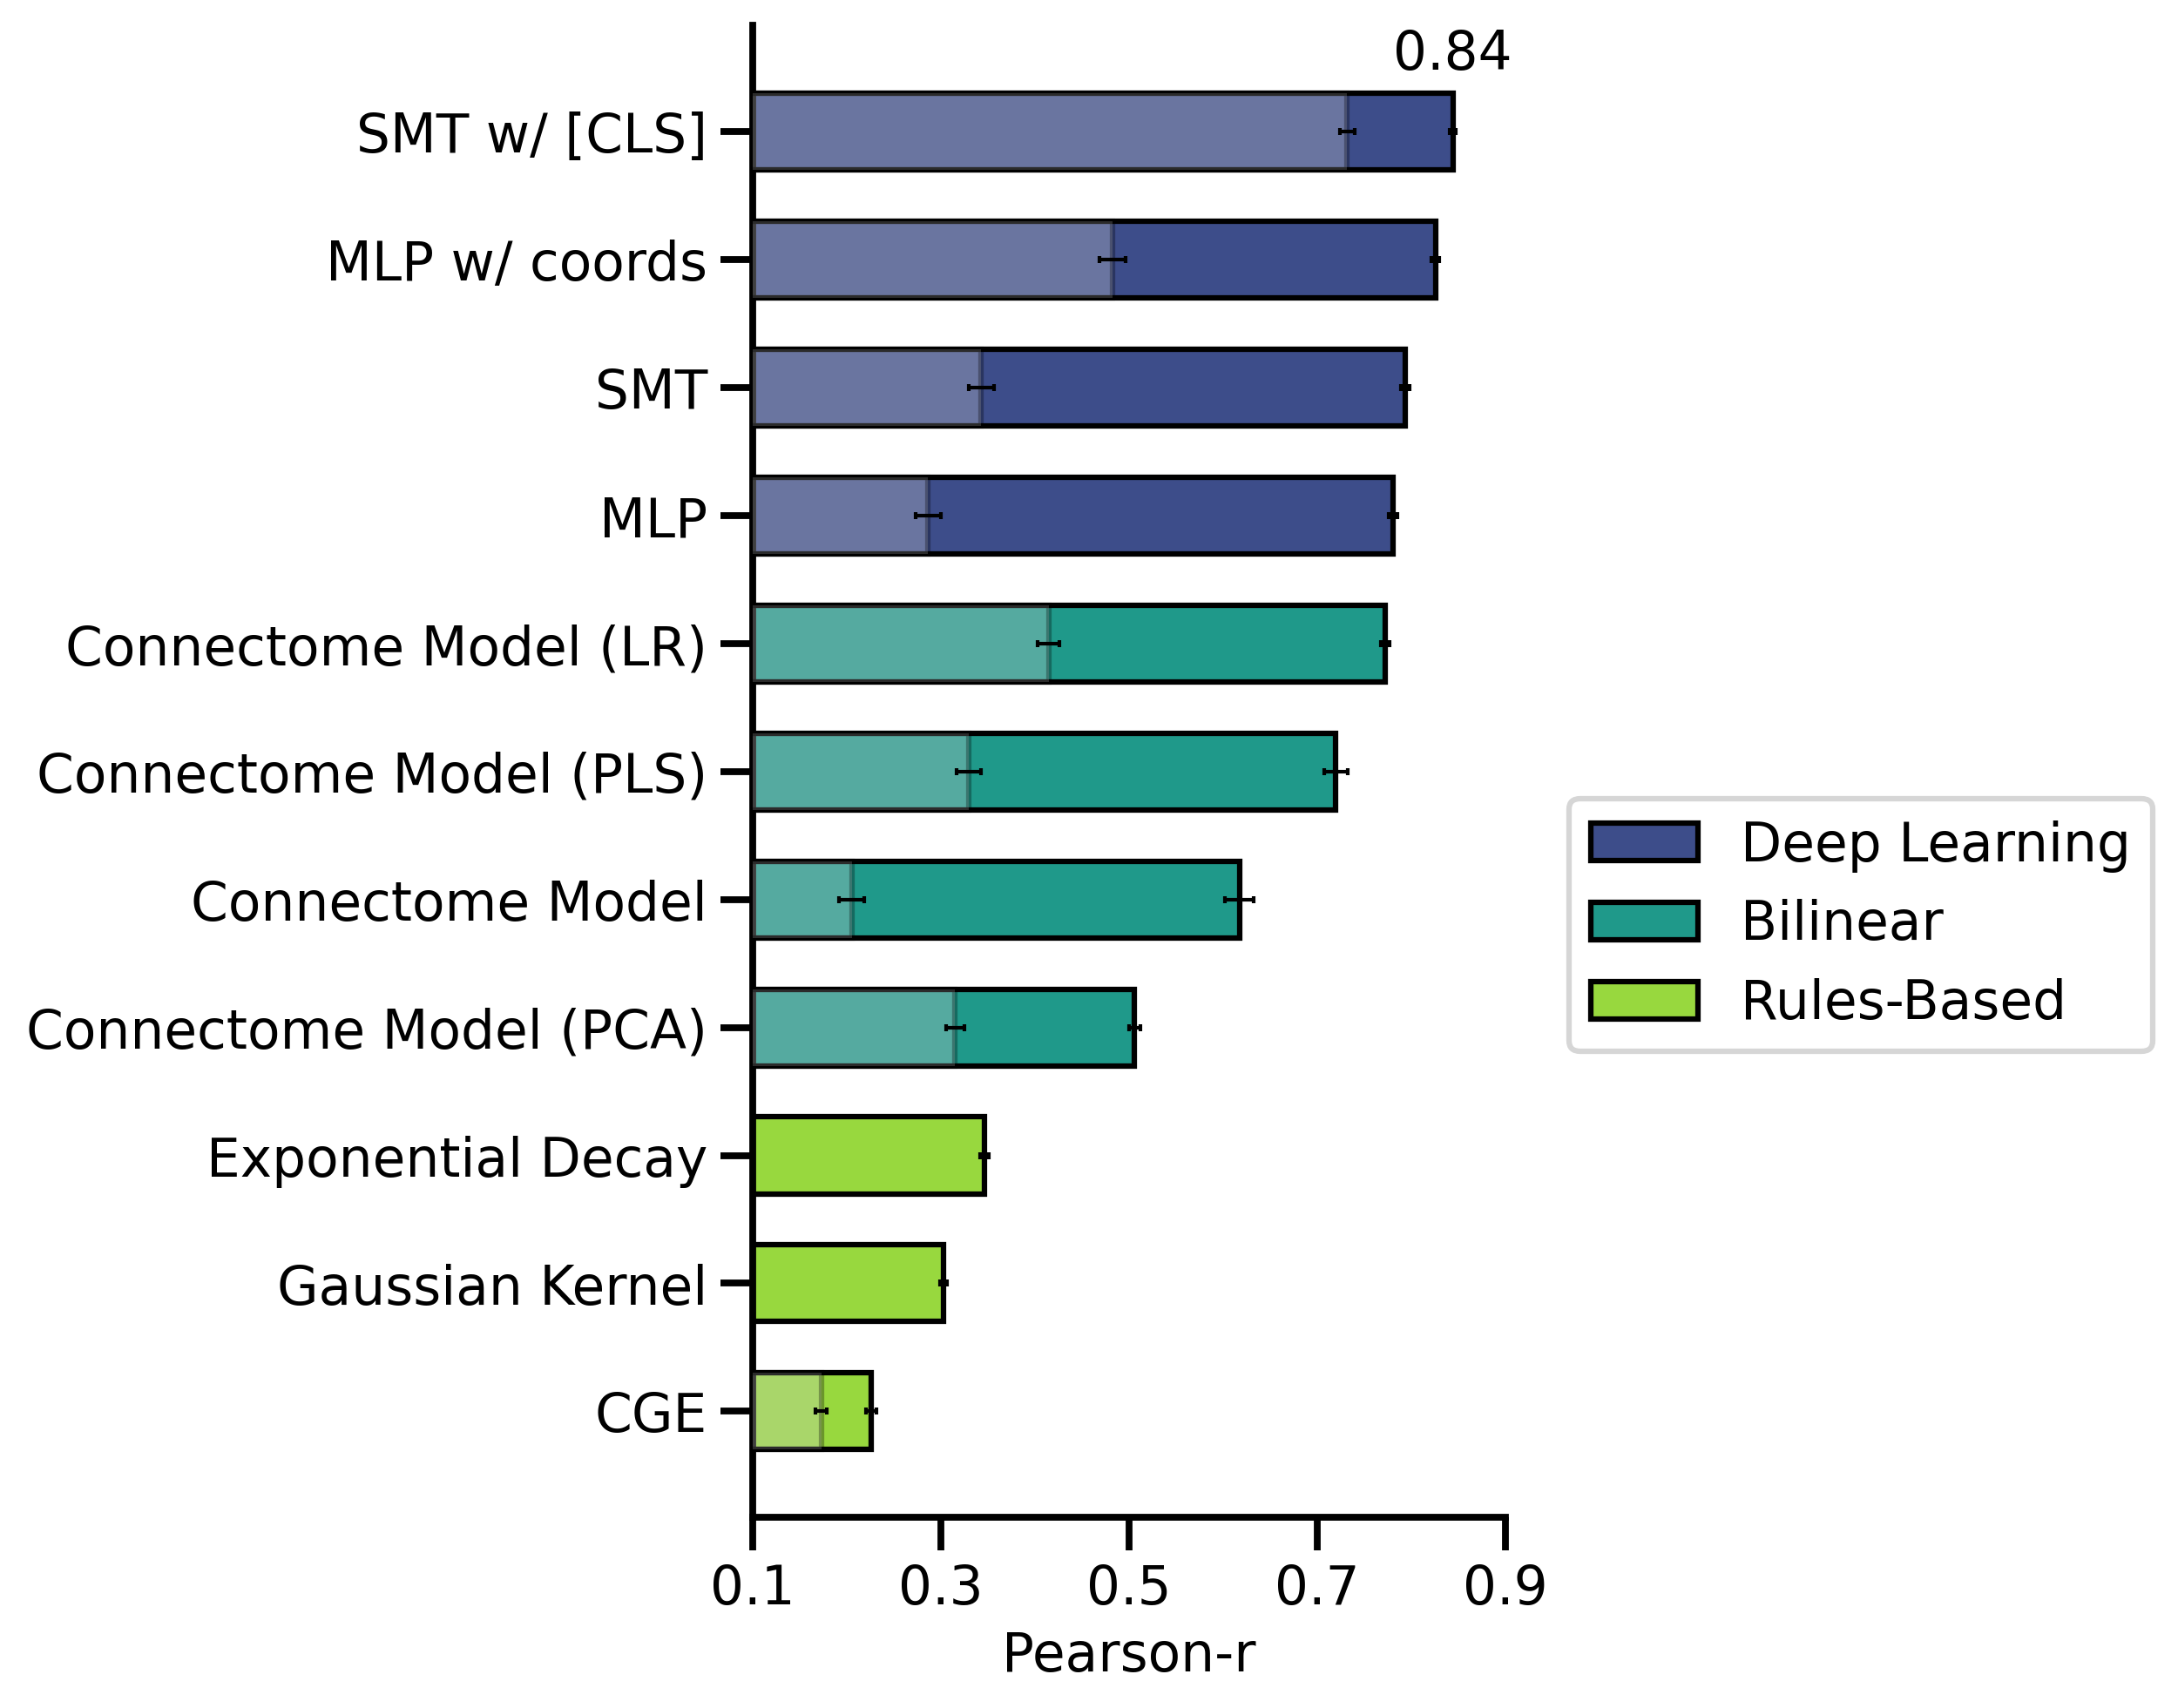

In [43]:
plot_true_vs_null_model_barchart_w_legend(
    summary_true_dict=summary_dict_random,                # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_random_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    xlim=(0.1, 0.9),
    overlay_style='alpha'                         

)

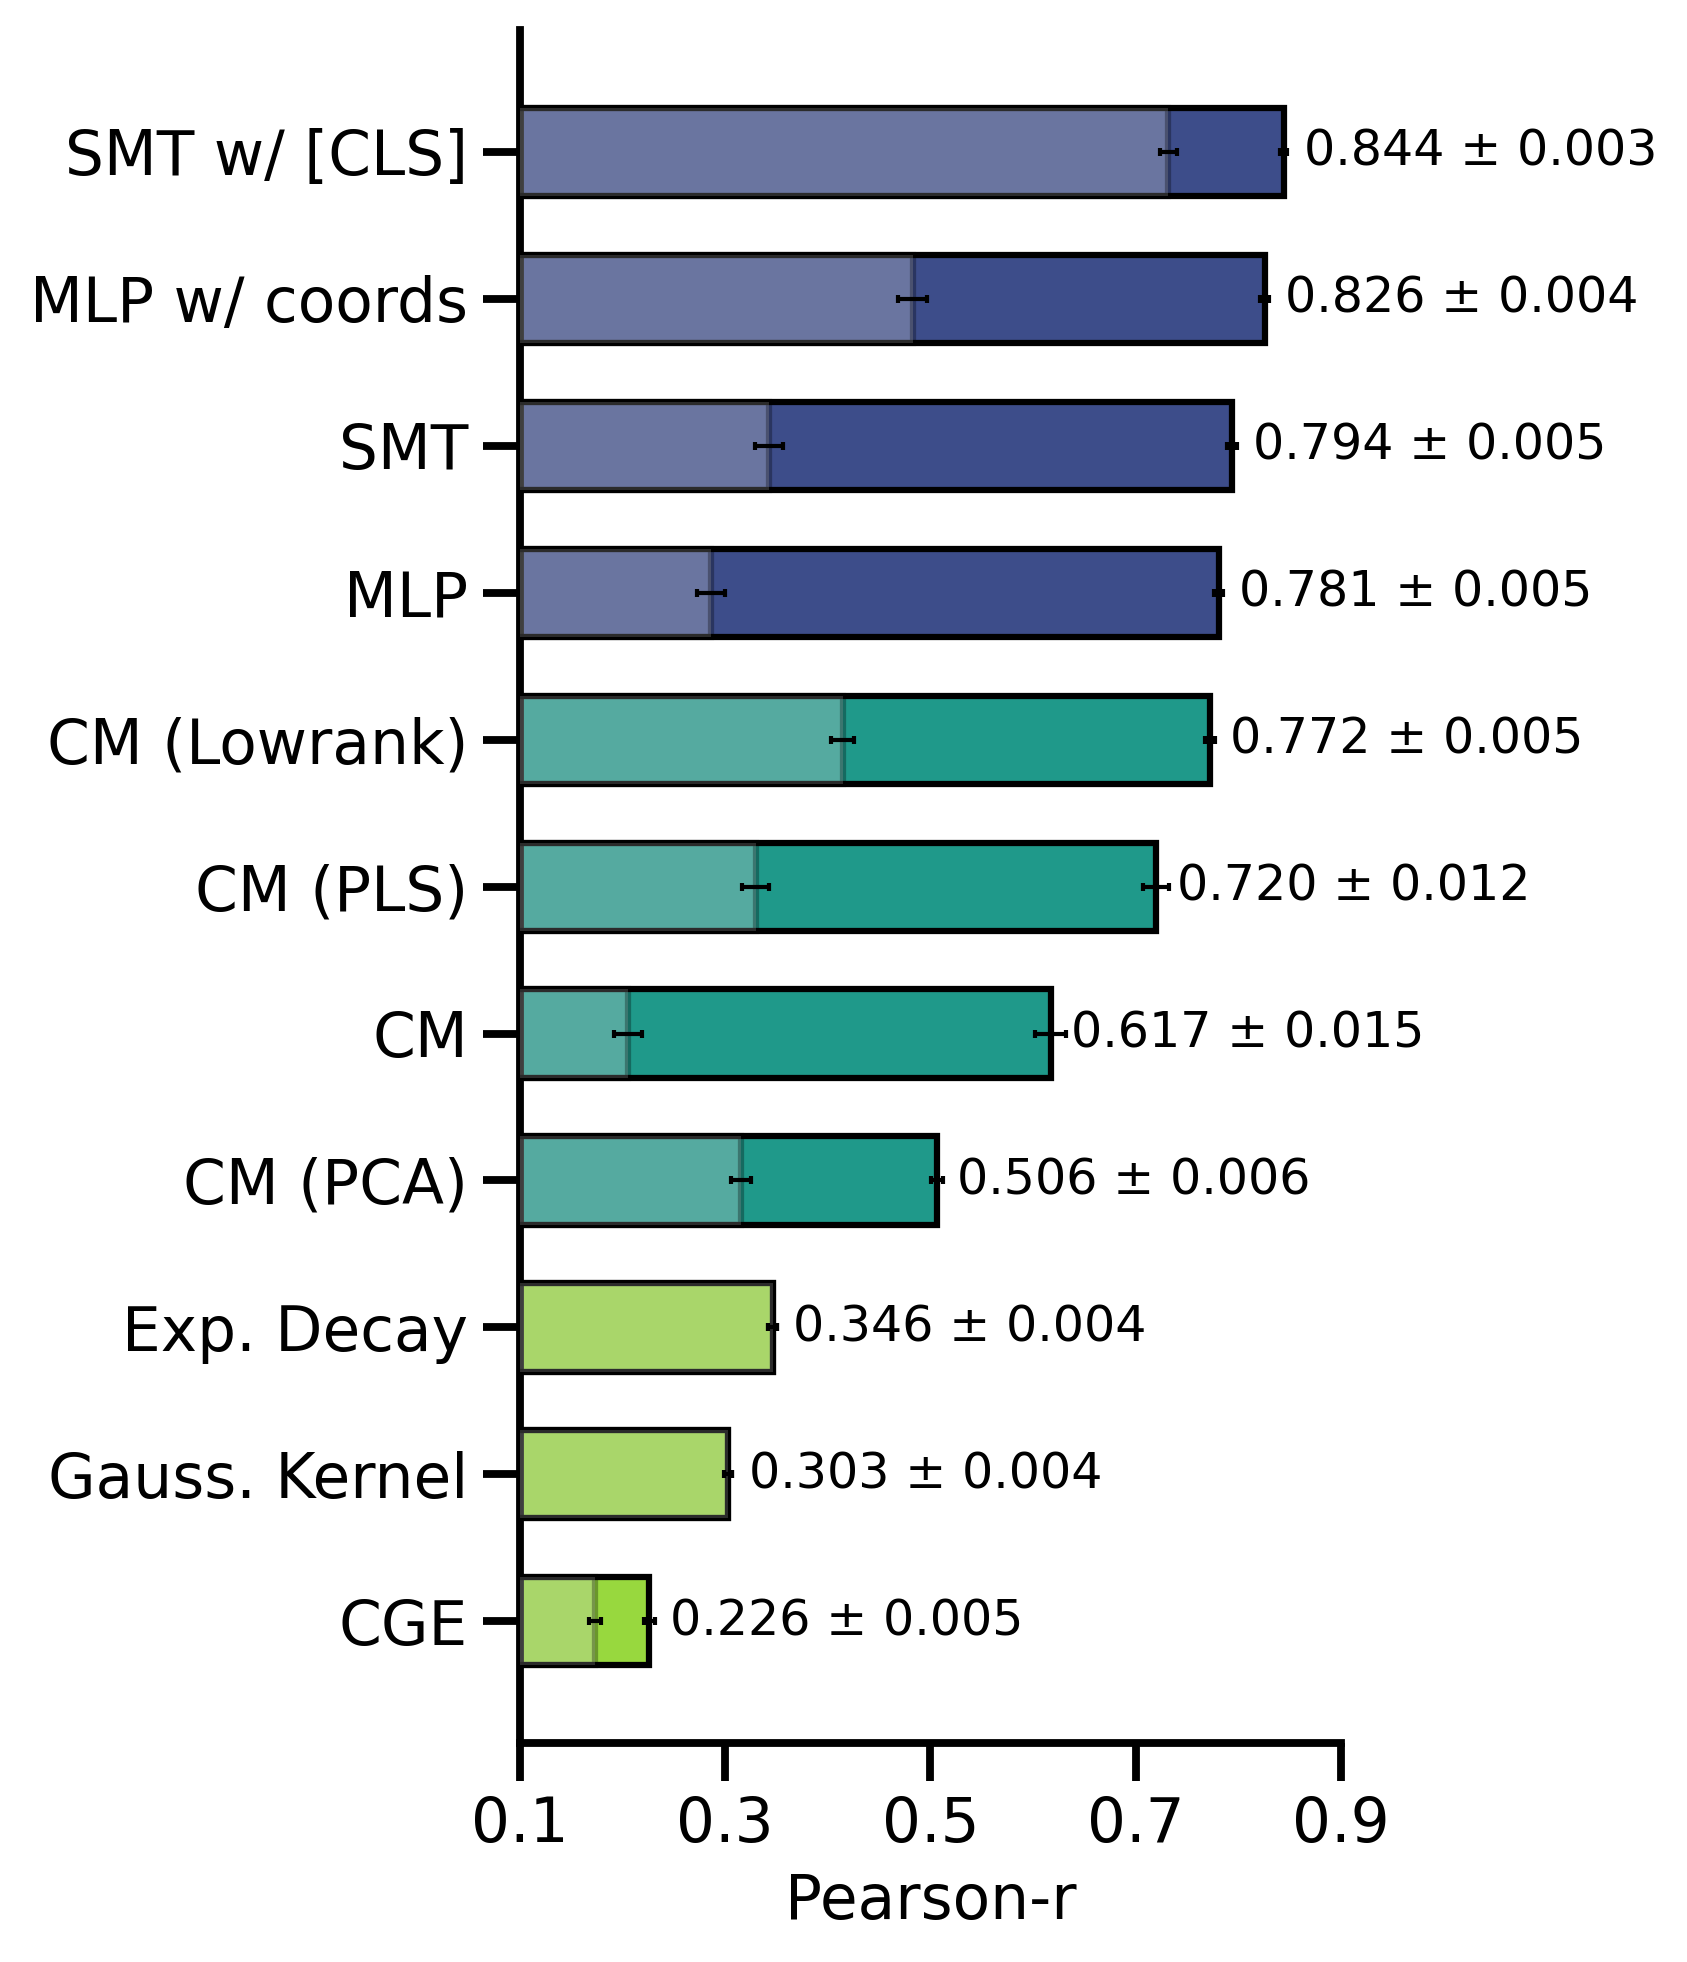

{'Non-Linear': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253),
 'Feature Based': (0.595839, 0.848717, 0.243329)}

In [44]:
# PLot with standard error bars
plot_true_vs_null_model_barchart(
    summary_true_dict=summary_dict_random,                # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_random_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    xlim=(0.1, 0.9),
    overlay_style='alpha',                          # or 'alpha'
    display_metric=True
)

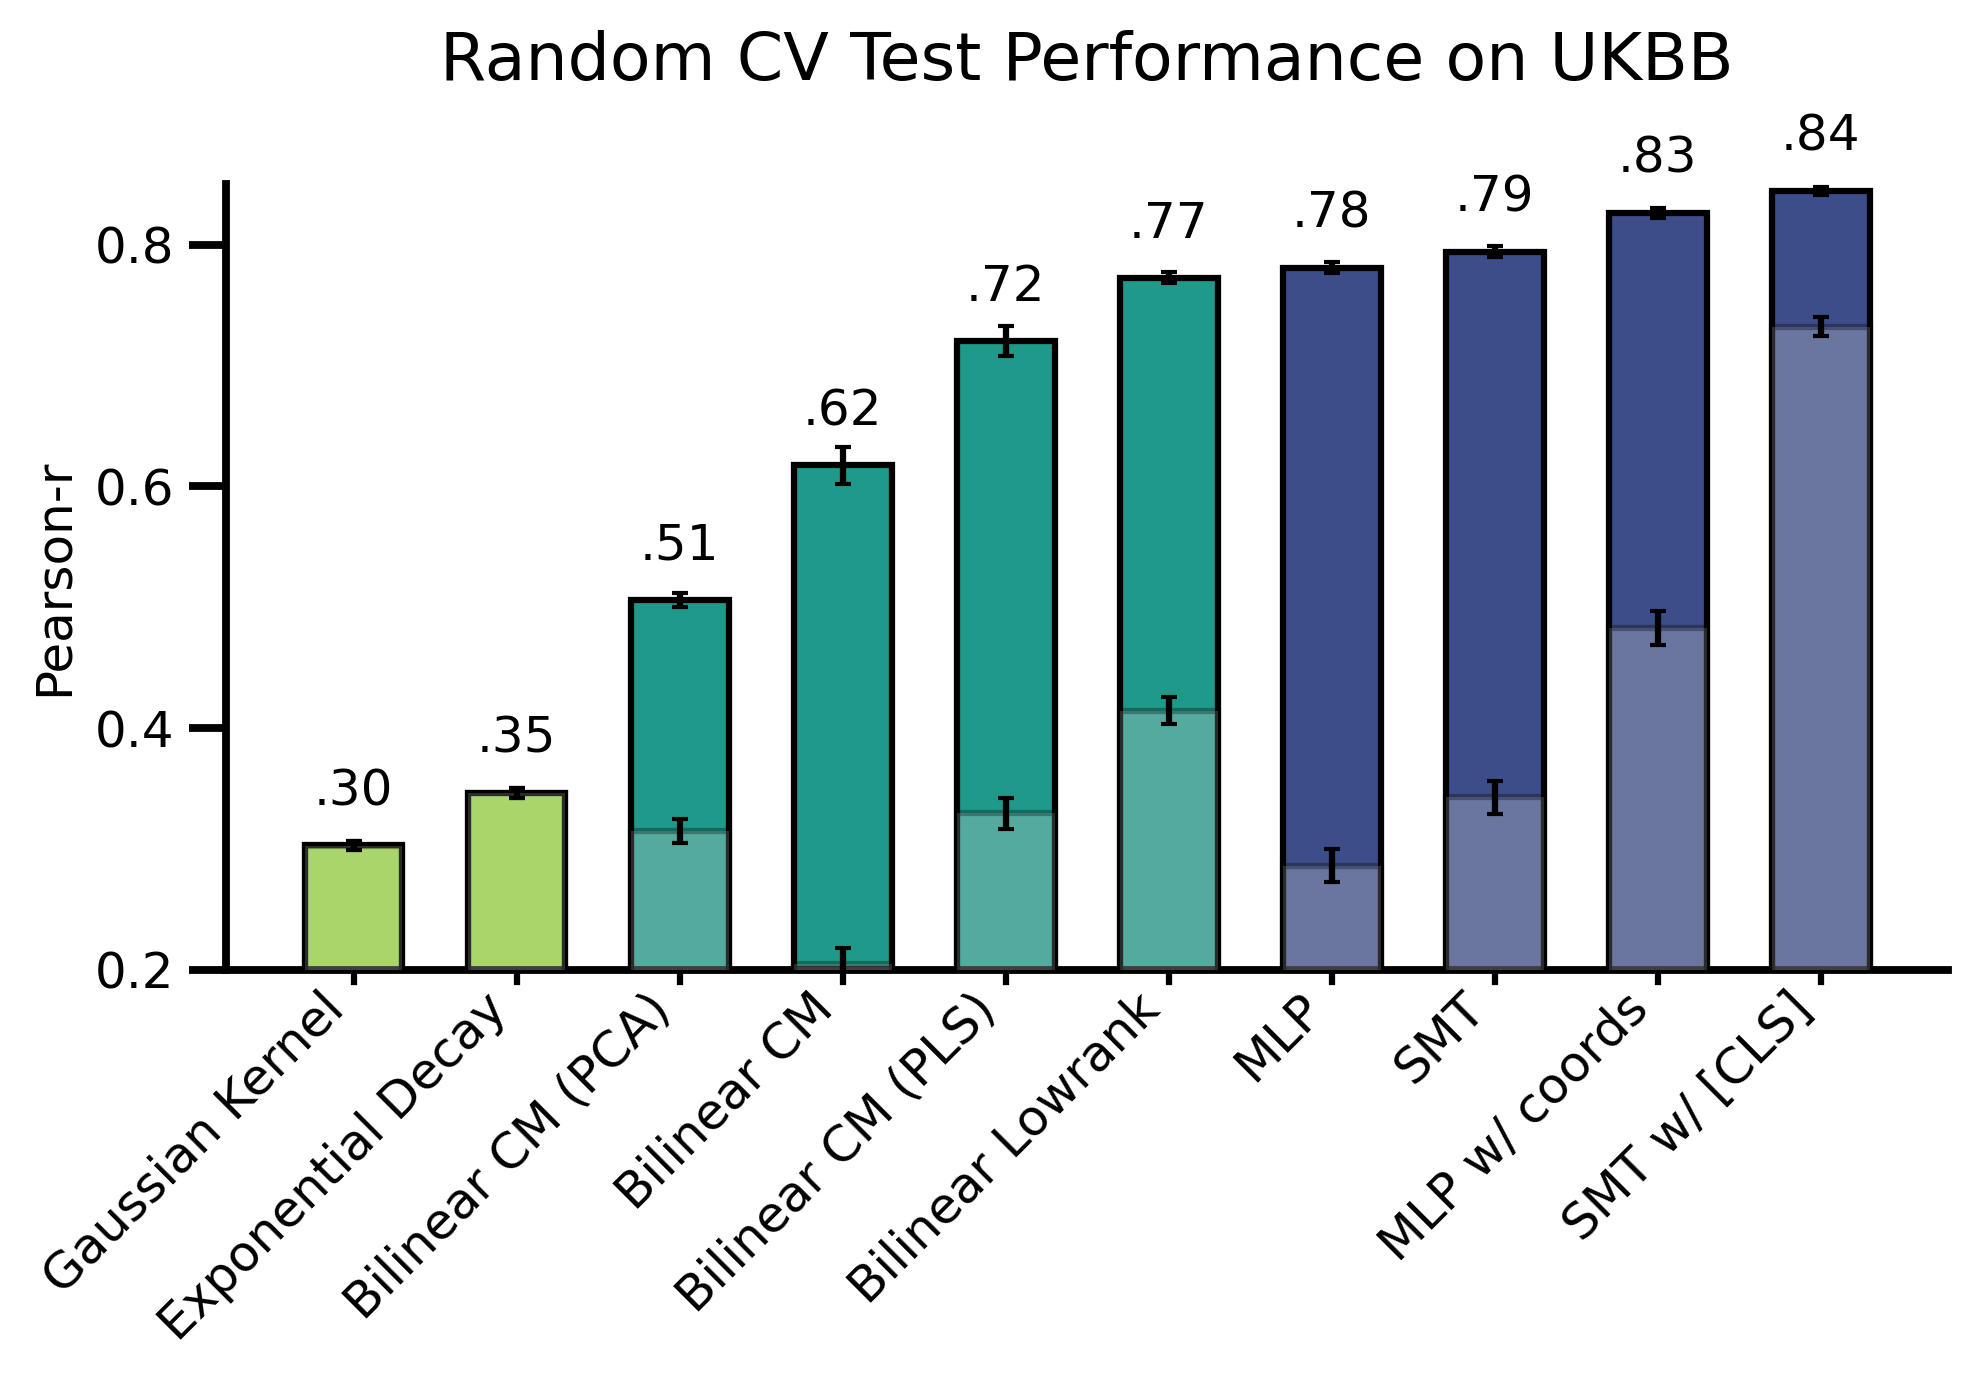

{'Deep Learning': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253),
 'Rules-Based': (0.595839, 0.848717, 0.243329)}

In [148]:
plot_final_subsetted_barchart(
    summary_true_dict=summary_dict_random,        # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_random_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    ylim=(0.2, .85),
    overlay_style='alpha',                          # or 'alpha'
    #display_metric=True,
    title="Random CV Test Performance on UKBB",
    horizontal=True, 
    model_groups = {
        'Deep Learning': {
            'dynamic_mlp': 'MLP',
            'dynamic_mlp_coords': 'MLP w/ coords',
            'shared_transformer': 'SMT',
            'shared_transformer_cls': 'SMT w/ [CLS]'
        },
        'Bilinear': {
            'bilinear_CM': 'Bilinear CM',
            'bilinear_CM_PCA': 'Bilinear CM (PCA)',
            'pls_bilineardecoder': 'Bilinear CM (PLS)',
            'bilinear_lowrank': 'Bilinear Lowrank'
        },
        'Rules-Based': {
            'cge': 'Corr. Gene Exp.',
            'gaussian_kernel': 'Gaussian Kernel',
            'exponential_decay': 'Exponential Decay'
        }
    }
)

Search and plot spatial

In [7]:
# Define model groups and their valid feature types
models = ['cge', 'gaussian_kernel', 'exponential_decay',
          'bilinear_CM', 'pls_bilineardecoder', 'bilinear_lowrank',
          'dynamic_mlp', 'shared_transformer', 'shared_transformer_cls']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'cge': ['transcriptome_PCA'],
    'gaussian_kernel': ['euclidean'],
    'exponential_decay': ['euclidean'],
    'bilinear_CM': ['transcriptome', 'transcriptome_PCA'],
    'pls_bilineardecoder': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome']
}

model_groups = {
    'rules based': ['cge', 'gaussian_kernel', 'exponential_decay'],
    'bilinear': ['bilinear_CM', 'bilinear_CM_PCA', 'pls_bilineardecoder', 'bilinear_lowrank'],
    'deep learning': ['dynamic_mlp', 'dynamic_mlp_coords', 'shared_transformer', 'shared_transformer_cls']
}


# Time ranges for true models
time_ranges_true = {
    'default': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
    'model_specific': {
        'cge': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'gaussian_kernel': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'exponential_decay': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        # Reran for validation
        'bilinear_CM': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': days_ago_from_date('2025-09-01')},
        'pls_bilineardecoder': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': days_ago_from_date('2025-09-01')},
        'bilinear_lowrank': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': days_ago_from_date('2025-10-13')},
        'dynamic_mlp': {'within_last': days_ago_from_date('2025-10-08'), 'before_last': days_ago_from_date('2025-10-17')},
        'shared_transformer': {'within_last': days_ago_from_date('2025-10-11'), 'before_last': days_ago_from_date('2025-10-16')},
        'shared_transformer_cls': {'within_last': days_ago_from_date('2025-10-11'), 'before_last': days_ago_from_date('2025-10-16')}
    }
}

# Time ranges for null models
time_ranges_spin = {
    'default': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
    'model_specific': {
        'cge': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'gaussian_kernel': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'exponential_decay': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'bilinear_CM': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'pls_bilineardecoder': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        # Reran for validation
        'bilinear_lowrank': {'within_last': days_ago_from_date('2025-07-10'), 'before_last': 0},
        'dynamic_mlp': {'within_last': days_ago_from_date('2025-06-15'), 'before_last': 0},
        'shared_transformer': {'within_last': days_ago_from_date('2025-10-13'), 'before_last': 0},
        'shared_transformer_cls': {'within_last': days_ago_from_date('2025-10-13'), 'before_last': 0},
    }
}

cv_type = 'spatial'
null_model = 'none'

# Store summary DataFrames
summary_dict_spatial = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_spatial, time_ranges=time_ranges_true)


cv_type = 'spatial'
null_model = 'spin'

# Store summary DataFrames
summary_dict_spatial_spin = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_spatial_spin, time_ranges=time_ranges_spin)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=cge, cv_type=spatial, null_model=none, feature_type=transcriptome_PCA
✓ cge with transcriptome_PCA: Successfully found 40 runs
🔍 Fetching runs for: model=gaussian_kernel, cv_type=spatial, null_model=none, feature_type=euclidean
✓ gaussian_kernel with euclidean: Successfully found 40 runs
🔍 Fetching runs for: model=exponential_decay, cv_type=spatial, null_model=none, feature_type=euclidean
✓ exponential_decay with euclidean: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_CM, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ bilinear_CM: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_CM, cv_type=spatial, null_model=none, feature_type=transcriptome_PCA
✓ bilinear_CM_PCA: Successfully found 40 runs
🔍 Fetching runs for: model=pls_bilineardecoder, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ pls_bilineardecoder with tran

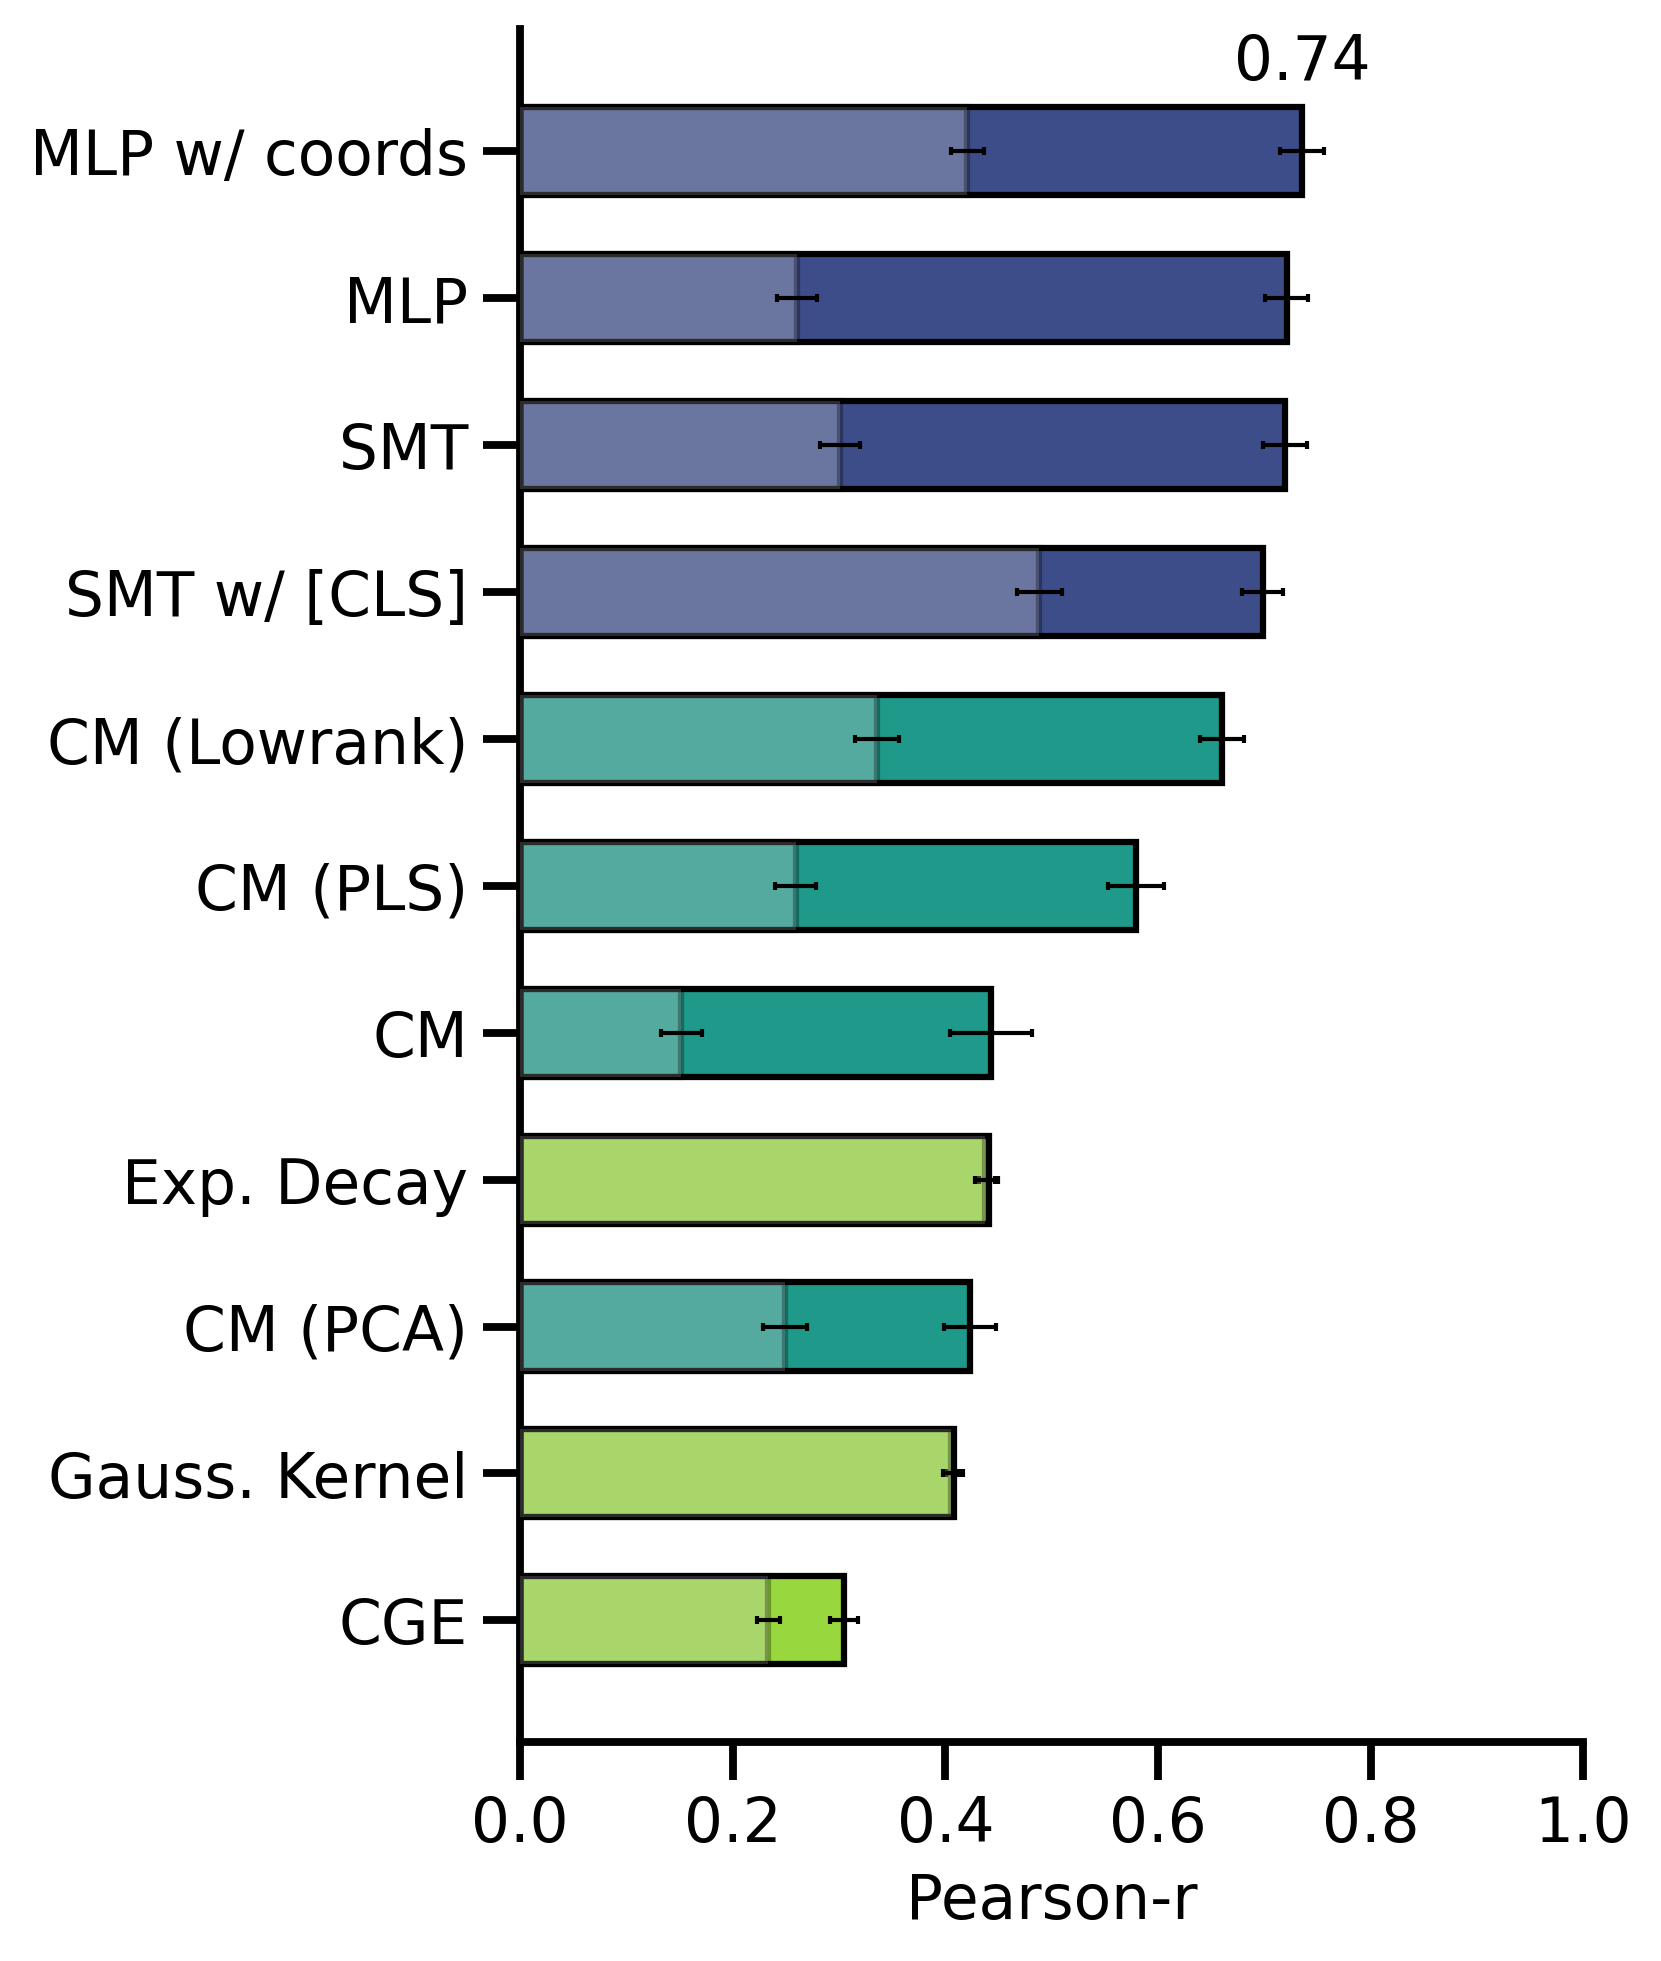

{'Non-Linear': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253),
 'Feature Based': (0.595839, 0.848717, 0.243329)}

In [46]:
plot_true_vs_null_model_barchart(
    summary_true_dict=summary_dict_spatial,                # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_spatial_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    xlim=(0.0, 1),
    overlay_style='alpha',                          # or 'alpha'
    display_metric=False
)

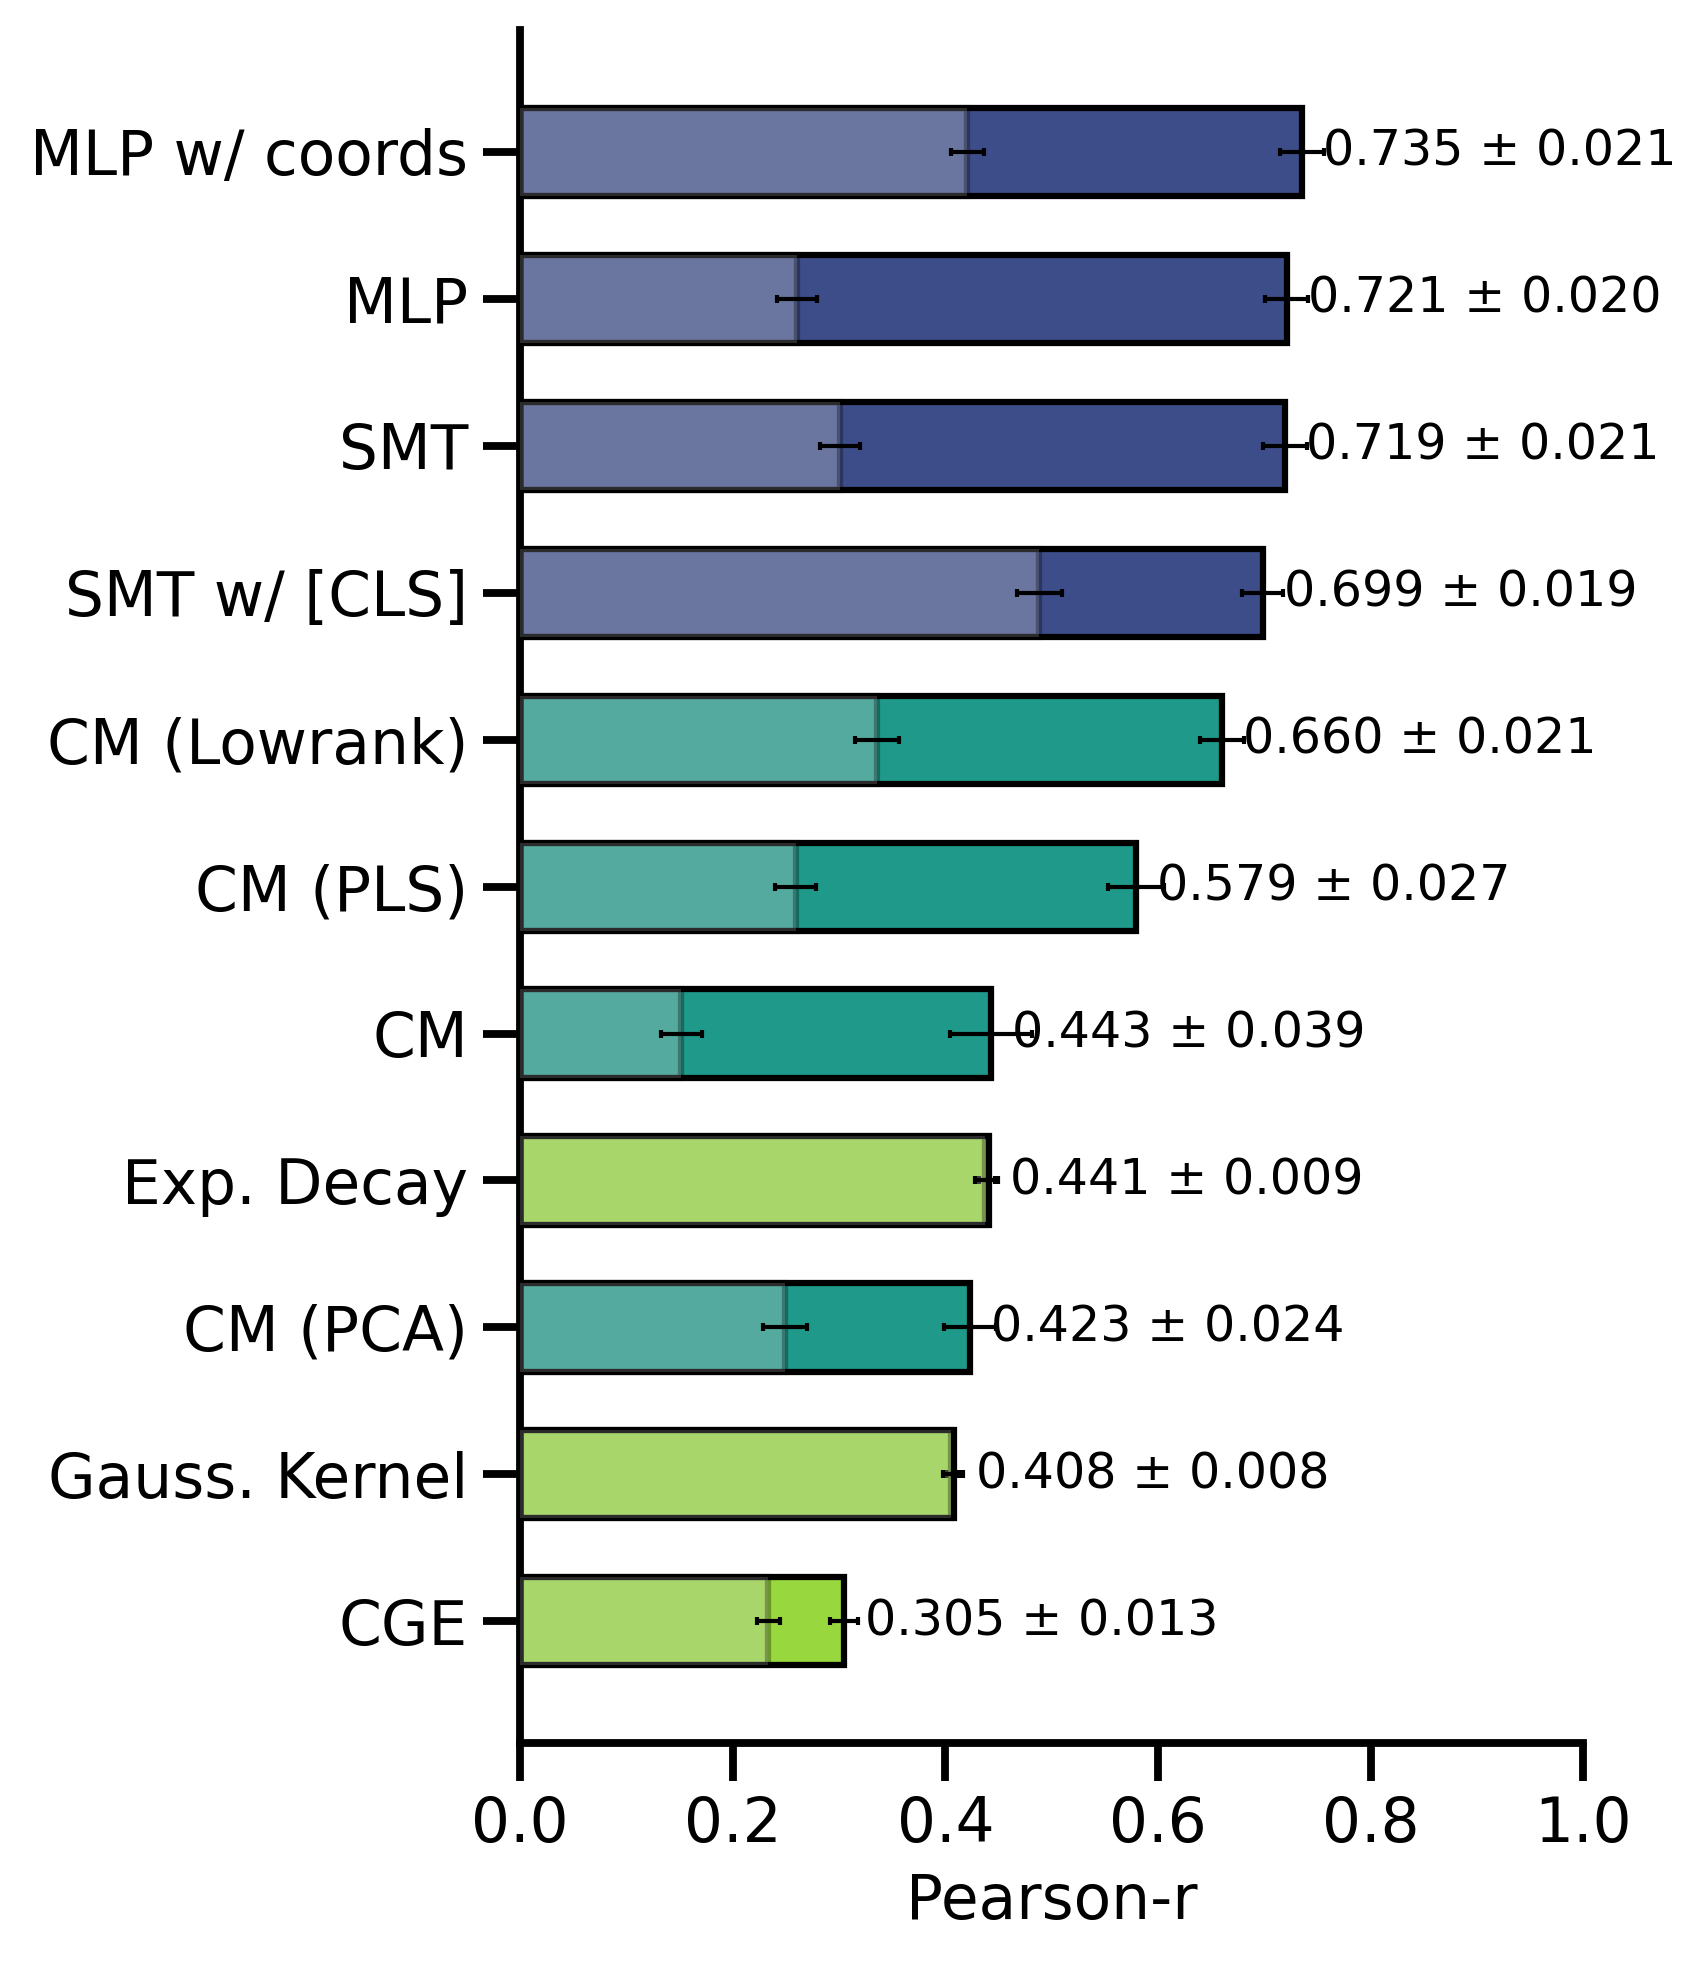

{'Non-Linear': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253),
 'Feature Based': (0.595839, 0.848717, 0.243329)}

In [47]:
plot_true_vs_null_model_barchart(
    summary_true_dict=summary_dict_spatial,                # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_spatial_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    xlim=(0.0, 1),
    overlay_style='alpha',                          # or 'alpha'
    display_metric=True
)

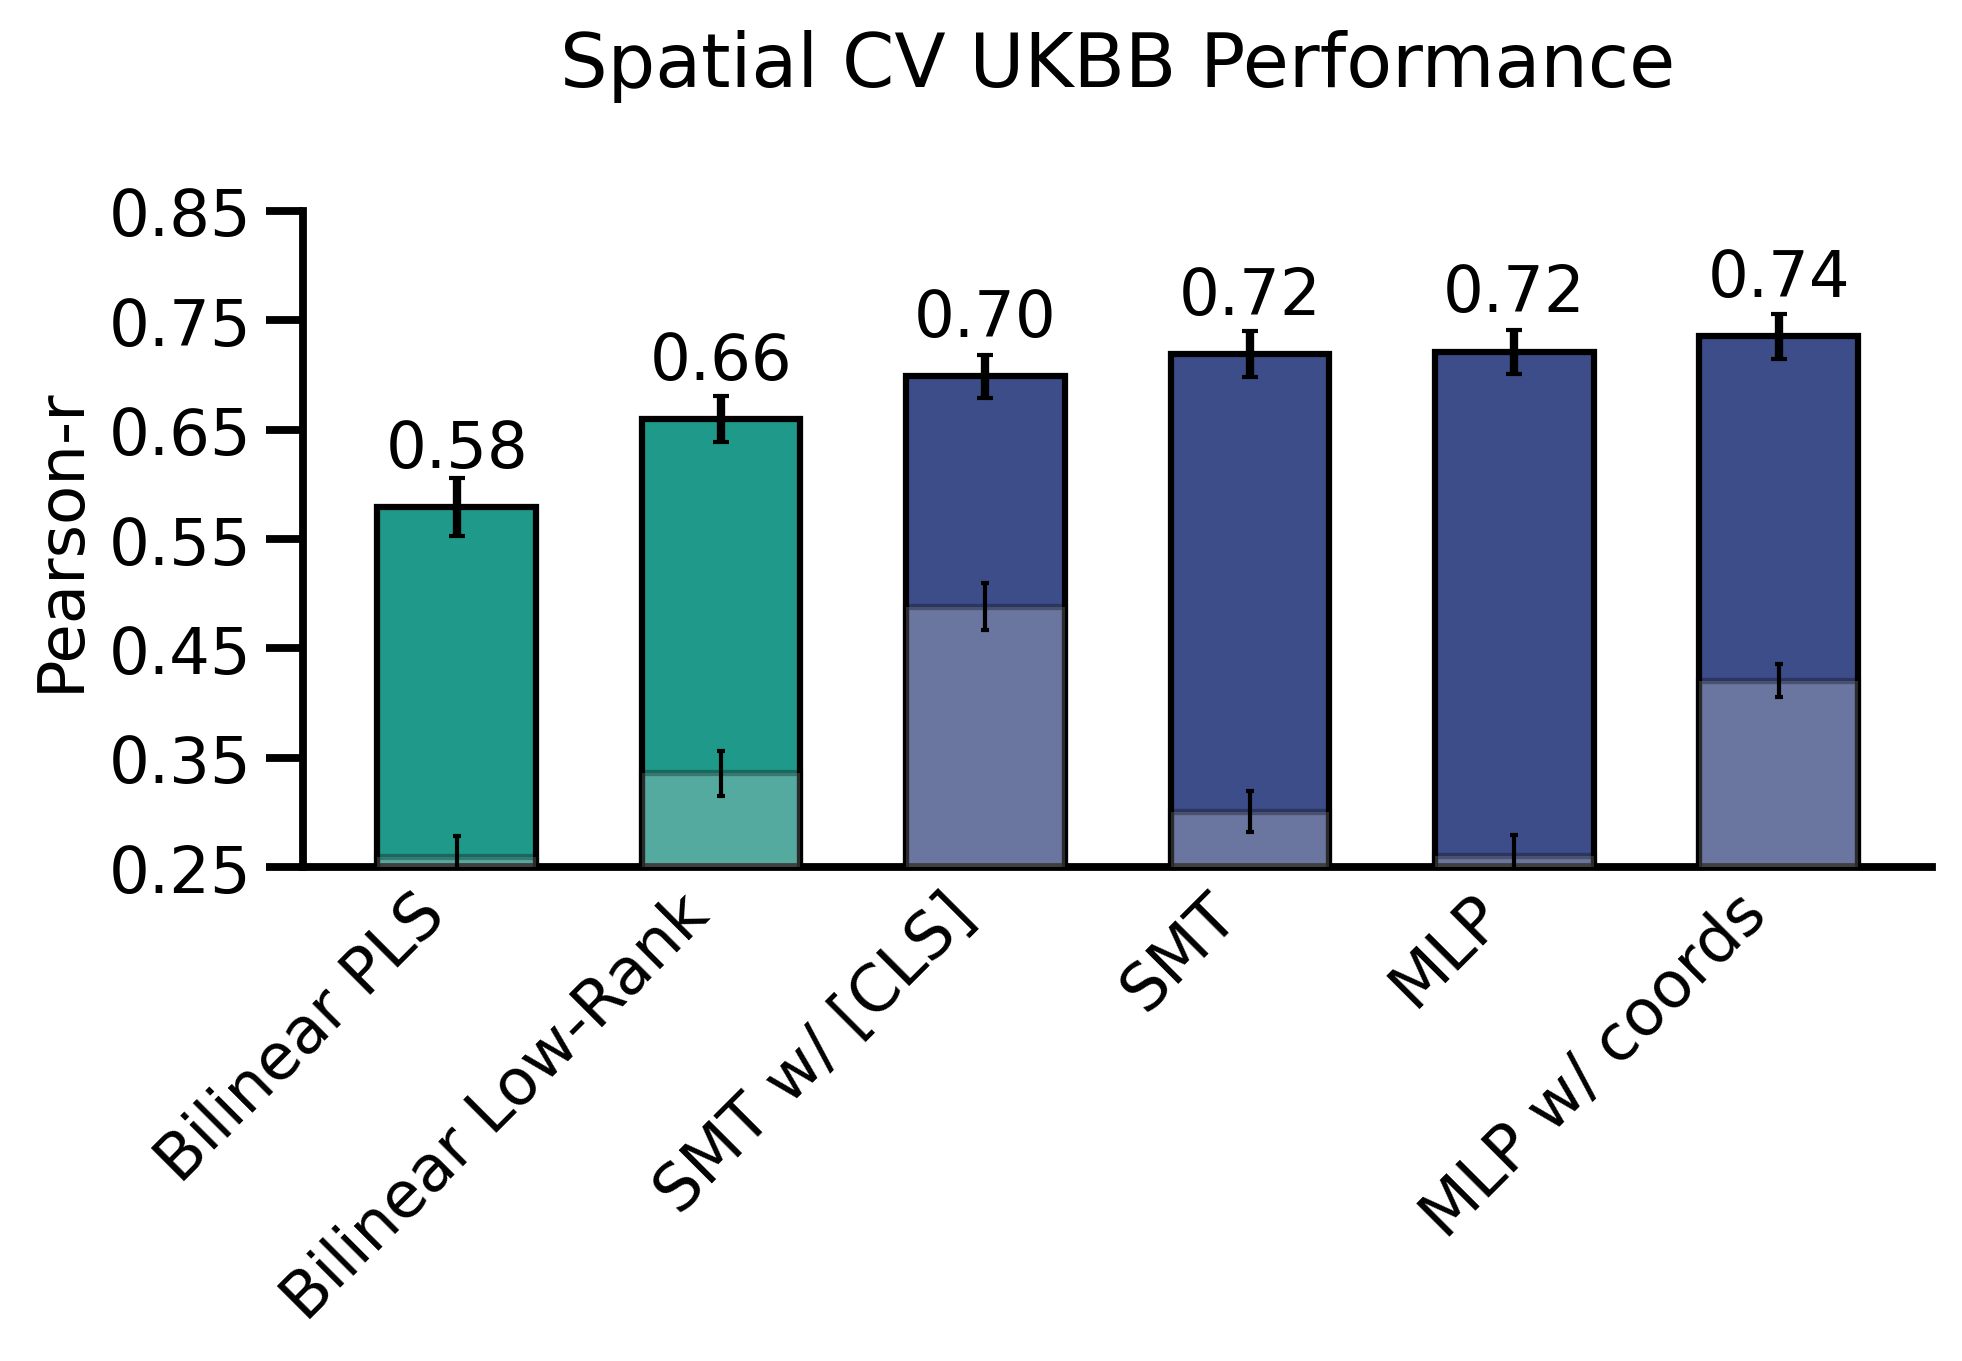

{'Non-Linear': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253)}

In [50]:
plot_final_subsetted_barchart(
    summary_true_dict=summary_dict_spatial,        # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_spatial_spin,           # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    ylim=(0.25, .85),
    overlay_style='alpha',                          # or 'alpha'
    #display_metric=False,
    title="Spatial CV UKBB Performance",
    horizontal=True
)

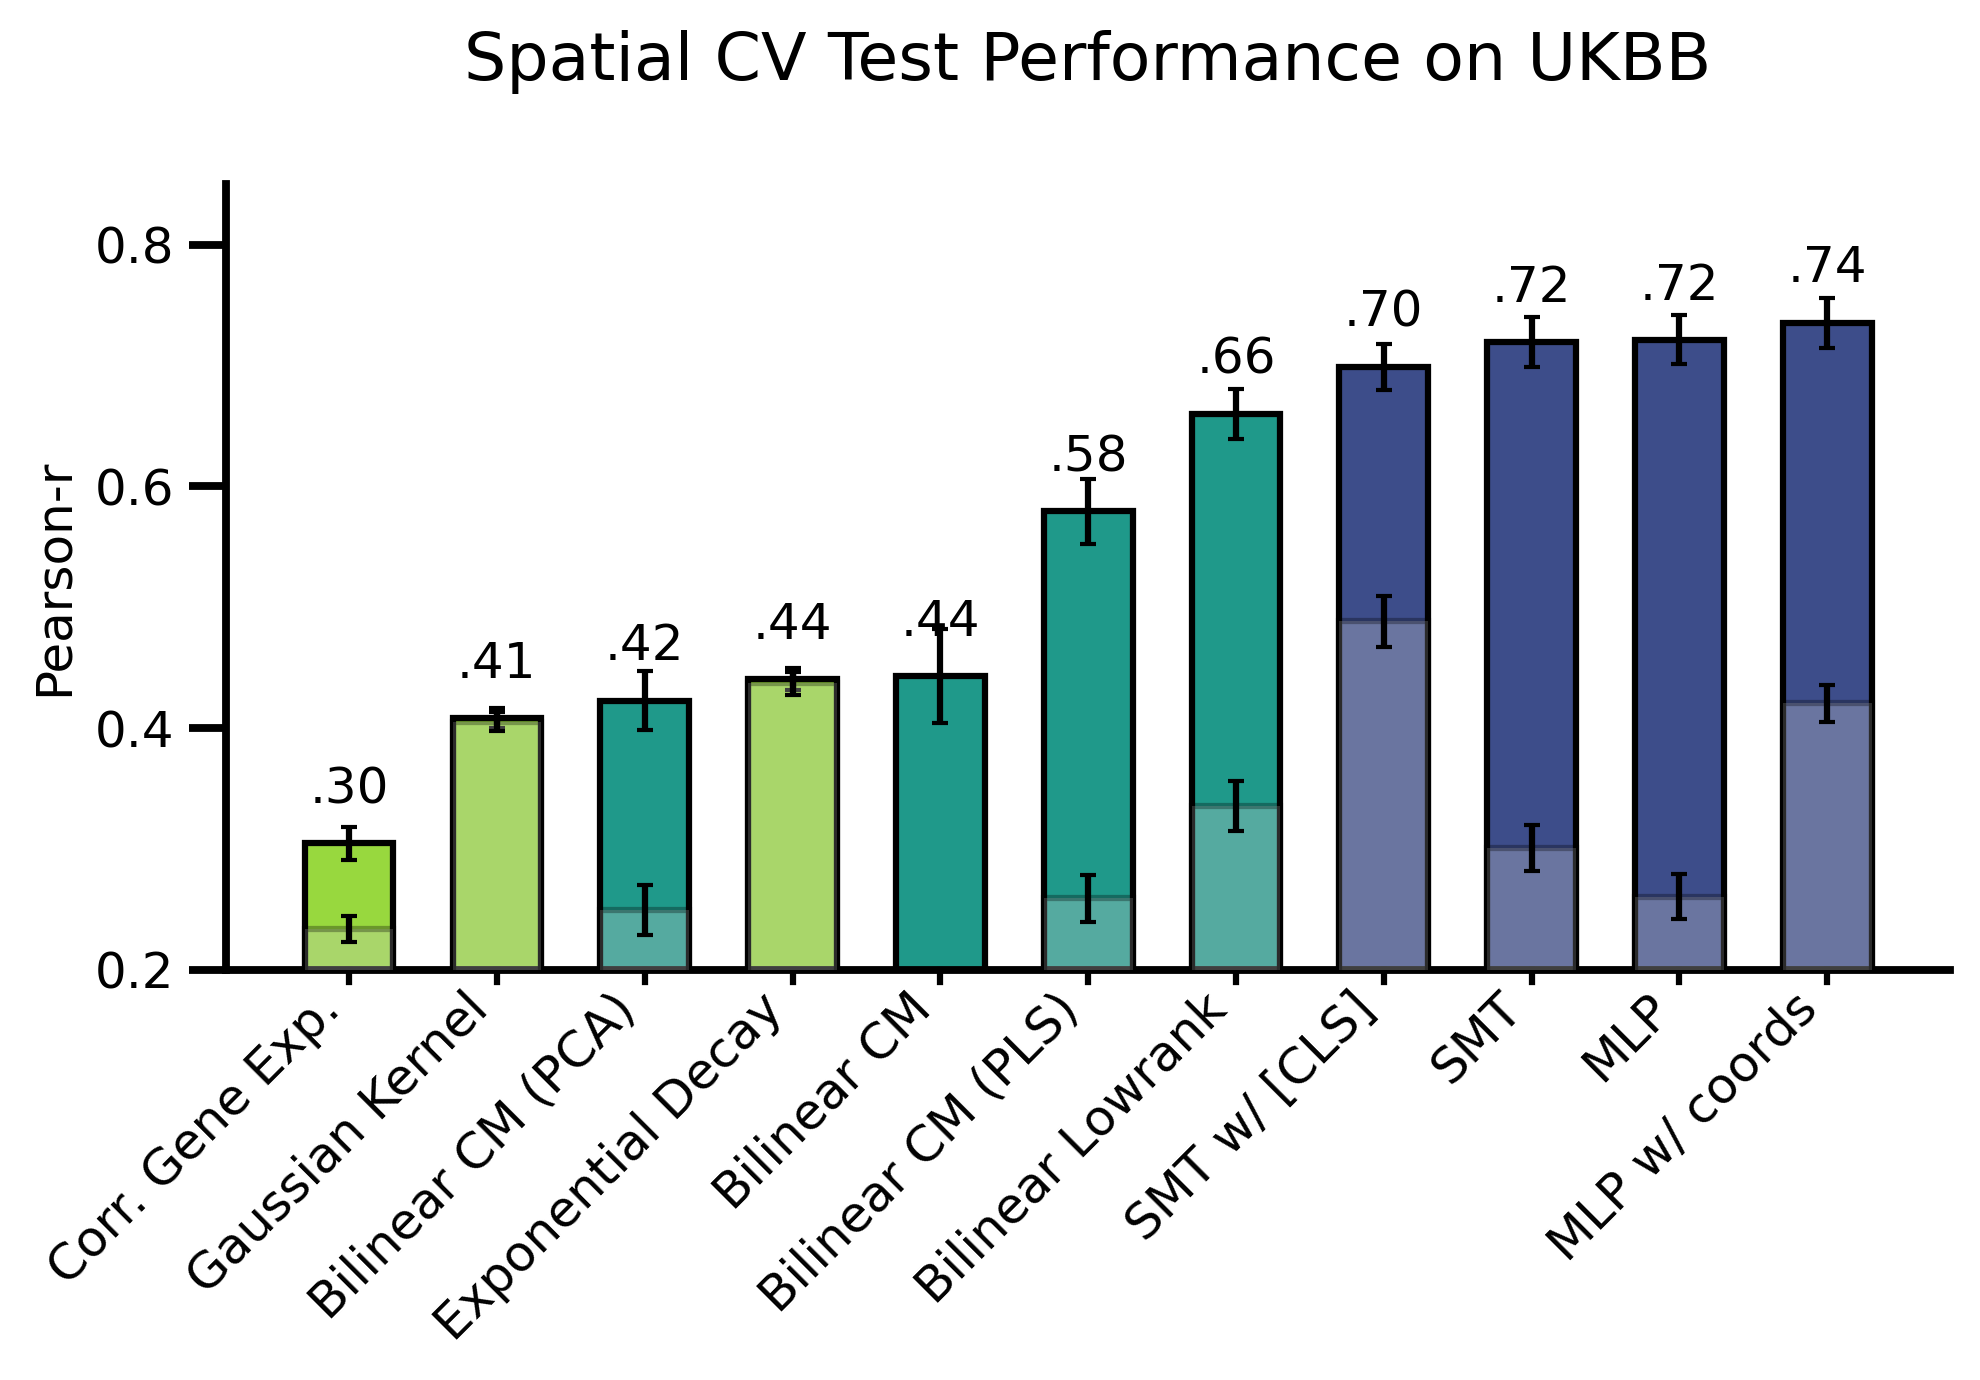

{'Deep Learning': (0.239346, 0.300855, 0.540844),
 'Bilinear': (0.120092, 0.600104, 0.54253),
 'Rules-Based': (0.595839, 0.848717, 0.243329)}

In [147]:
plot_final_subsetted_barchart(
    summary_true_dict=summary_dict_spatial,        # cv_type='spatial', null_model='none'
    summary_null_dict=summary_dict_spatial_spin,   # cv_type='spatial', null_model='spin'
    metric="test_pearson_r",
    ylim=(0.2, .85),
    overlay_style='alpha',                          # or 'alpha'
    #display_metric=True,
    title="Spatial CV Test Performance on UKBB",
    horizontal=True, 
    model_groups = {
        'Deep Learning': {
            'dynamic_mlp': 'MLP',
            'dynamic_mlp_coords': 'MLP w/ coords',
            'shared_transformer': 'SMT',
            'shared_transformer_cls': 'SMT w/ [CLS]'
        },
        'Bilinear': {
            'bilinear_CM': 'Bilinear CM',
            'bilinear_CM_PCA': 'Bilinear CM (PCA)',
            'pls_bilineardecoder': 'Bilinear CM (PLS)',
            'bilinear_lowrank': 'Bilinear Lowrank'
        },
        'Rules-Based': {
            'cge': 'Corr. Gene Exp.',
            'gaussian_kernel': 'Gaussian Kernel',
            'exponential_decay': 'Exponential Decay'
        }
    }
)

Build tables with all relevant metrics

In [10]:
def create_test_metric_dataframes(summary_dict):
    # Initialize empty lists for global and subnetwork metrics
    global_metrics = []
    subnetwork_metrics = []
    
    # Define global metric columns
    global_cols = ['pearson_r', 'r2', 'short_r', 'mid_r', 'long_r',
                  'strong_pos_r', 'strong_neg_r', 'weak_r',
                  'left_hemi_r', 'right_hemi_r', 'inter_hemi_r',
                  'mse', 'geodesic_distance']
                  
    # Define subnetworks
    networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 
                'Cont', 'Default', 'Subcortical', 'Cerebellum']
    
    # Process each model
    model_order = ['shared_transformer_cls', 'dynamic_mlp_coords', 'shared_transformer', 'dynamic_mlp']
    remaining_models = [m for m in reversed(summary_dict.keys()) if m not in model_order]
    ordered_models = model_order + remaining_models
    
    for model in ordered_models:
        if model not in summary_dict:
            continue
            
        df = summary_dict[model]
        
        # Global metrics
        global_row = {}
        for col in global_cols:
            mean = df.loc['mean', f'test_{col}']
            std = df.loc['std', f'test_{col}']
            global_row[col] = f"{mean:.3f} ± {std:.3f}"
        global_metrics.append({'Model': model, **global_row})
        
        # Subnetwork metrics  
        subnetwork_row = {'Model': model}
        for network in networks:
            # Intra-network correlation
            intra_mean = df.loc['mean', f'test_intra_network_{network}_r']
            intra_std = df.loc['std', f'test_intra_network_{network}_r']
            subnetwork_row[f'{network} Intra'] = f"{intra_mean:.3f} ± {intra_std:.3f}"
            
            # Inter-network correlation
            inter_mean = df.loc['mean', f'test_inter_network_{network}_r'] 
            inter_std = df.loc['std', f'test_inter_network_{network}_r']
            subnetwork_row[f'{network} Inter'] = f"{inter_mean:.3f} ± {inter_std:.3f}"
            
        subnetwork_metrics.append(subnetwork_row)
    
    # Create dataframes
    global_df = pd.DataFrame(global_metrics).set_index('Model')
    subnetwork_df = pd.DataFrame(subnetwork_metrics).set_index('Model')
    
    return global_df, subnetwork_df

In [40]:
# Create the dataframes for random
global_metrics_df_random, subnetwork_metrics_df_random = create_test_metric_dataframes(summary_dict_random)

print("\nRANDOM TEST METRICS:")
print("\nGlobal Test Metrics:")
display(global_metrics_df_random)
print("\nSubnetwork Test Metrics:") 
display(subnetwork_metrics_df_random)

# Create the dataframes for random
global_metrics_df_random_spin, subnetwork_metrics_df_random_spin = create_test_metric_dataframes(summary_dict_random_spin)

print("\nRandom Test Spin Metrics:")
print("\nGlobal Test  Spin Metrics:")
display(global_metrics_df_random_spin)


RANDOM TEST METRICS:

Global Test Metrics:


,pearson_r,r2,short_r,mid_r,long_r,strong_pos_r,strong_neg_r,weak_r,left_hemi_r,right_hemi_r,inter_hemi_r,mse,geodesic_distance
Model,,,,,,,,,,,,,
shared_transformer_cls,0.844 ± 0.022,0.707 ± 0.040,0.862 ± 0.020,0.820 ± 0.027,0.783 ± 0.057,0.550 ± 0.059,0.250 ± 0.126,0.750 ± 0.033,0.829 ± 0.034,0.863 ± 0.026,0.842 ± 0.024,0.010 ± 0.001,9.803 ± 0.928
dynamic_mlp_coords,0.826 ± 0.027,0.674 ± 0.050,0.847 ± 0.026,0.799 ± 0.032,0.752 ± 0.064,0.532 ± 0.072,0.157 ± 0.128,0.729 ± 0.035,0.816 ± 0.036,0.846 ± 0.034,0.821 ± 0.031,0.011 ± 0.001,9.591 ± 0.783
shared_transformer,0.794 ± 0.029,0.610 ± 0.057,0.825 ± 0.026,0.763 ± 0.032,0.691 ± 0.072,0.483 ± 0.069,0.139 ± 0.126,0.687 ± 0.033,0.781 ± 0.040,0.831 ± 0.032,0.786 ± 0.032,0.013 ± 0.001,10.194 ± 0.982
dynamic_mlp,0.781 ± 0.029,0.587 ± 0.054,0.816 ± 0.027,0.748 ± 0.033,0.668 ± 0.060,0.479 ± 0.076,0.095 ± 0.124,0.669 ± 0.036,0.785 ± 0.038,0.809 ± 0.040,0.766 ± 0.035,0.014 ± 0.001,10.249 ± 1.074
bilinear_lowrank,0.772 ± 0.029,0.594 ± 0.044,0.798 ± 0.025,0.741 ± 0.035,0.695 ± 0.060,0.399 ± 0.066,0.086 ± 0.121,0.682 ± 0.040,0.754 ± 0.046,0.803 ± 0.033,0.771 ± 0.031,0.014 ± 0.001,11.183 ± 1.103
pls_bilineardecoder,0.720 ± 0.079,0.517 ± 0.103,0.754 ± 0.078,0.678 ± 0.089,0.626 ± 0.109,0.370 ± 0.096,0.058 ± 0.125,0.621 ± 0.081,0.703 ± 0.089,0.749 ± 0.077,0.718 ± 0.078,0.016 ± 0.004,11.956 ± 1.929
bilinear_CM_PCA,0.506 ± 0.037,0.239 ± 0.077,0.567 ± 0.048,0.429 ± 0.039,0.347 ± 0.069,0.306 ± 0.078,0.019 ± 0.117,0.374 ± 0.034,0.490 ± 0.052,0.553 ± 0.047,0.498 ± 0.042,0.025 ± 0.003,15.302 ± 0.639
bilinear_CM,0.617 ± 0.095,0.093 ± 0.396,0.629 ± 0.118,0.592 ± 0.091,0.552 ± 0.089,0.223 ± 0.103,0.082 ± 0.119,0.528 ± 0.089,0.652 ± 0.084,0.687 ± 0.076,0.583 ± 0.113,0.030 ± 0.012,16.070 ± 1.388
exponential_decay,0.346 ± 0.028,0.117 ± 0.022,0.411 ± 0.038,0.070 ± 0.032,0.095 ± 0.069,0.338 ± 0.045,0.113 ± 0.091,0.195 ± 0.024,0.399 ± 0.048,0.428 ± 0.045,0.242 ± 0.044,0.030 ± 0.003,15.667 ± 0.711



Subnetwork Test Metrics:


,Vis Intra,Vis Inter,SomMot Intra,SomMot Inter,DorsAttn Intra,DorsAttn Inter,SalVentAttn Intra,SalVentAttn Inter,Limbic Intra,Limbic Inter,Cont Intra,Cont Inter,Default Intra,Default Inter,Subcortical Intra,Subcortical Inter,Cerebellum Intra,Cerebellum Inter
Model,,,,,,,,,,,,,,,,,,
shared_transformer_cls,0.886 ± 0.059,0.872 ± 0.024,0.876 ± 0.061,0.875 ± 0.029,0.861 ± 0.076,0.876 ± 0.028,0.853 ± 0.093,0.867 ± 0.028,0.856 ± 0.144,0.867 ± 0.031,0.838 ± 0.102,0.853 ± 0.040,0.809 ± 0.081,0.843 ± 0.034,0.789 ± 0.112,0.855 ± 0.028,0.684 ± 0.507,0.853 ± 0.035
dynamic_mlp_coords,0.880 ± 0.054,0.866 ± 0.024,0.870 ± 0.055,0.866 ± 0.029,0.843 ± 0.114,0.866 ± 0.030,0.854 ± 0.084,0.860 ± 0.031,0.845 ± 0.145,0.858 ± 0.035,0.825 ± 0.106,0.847 ± 0.040,0.824 ± 0.060,0.840 ± 0.029,0.774 ± 0.121,0.843 ± 0.029,0.603 ± 0.527,0.840 ± 0.043
shared_transformer,0.872 ± 0.054,0.843 ± 0.023,0.842 ± 0.073,0.845 ± 0.032,0.821 ± 0.138,0.845 ± 0.035,0.818 ± 0.143,0.833 ± 0.039,0.843 ± 0.126,0.833 ± 0.040,0.790 ± 0.105,0.813 ± 0.043,0.796 ± 0.056,0.812 ± 0.029,0.664 ± 0.205,0.808 ± 0.033,0.743 ± 0.336,0.808 ± 0.042
dynamic_mlp,0.858 ± 0.067,0.834 ± 0.027,0.836 ± 0.064,0.839 ± 0.032,0.808 ± 0.144,0.840 ± 0.040,0.815 ± 0.167,0.829 ± 0.039,0.822 ± 0.172,0.826 ± 0.047,0.783 ± 0.104,0.808 ± 0.043,0.782 ± 0.073,0.804 ± 0.033,0.654 ± 0.259,0.799 ± 0.038,0.524 ± 0.516,0.791 ± 0.058
bilinear_lowrank,0.838 ± 0.065,0.818 ± 0.027,0.821 ± 0.061,0.827 ± 0.031,0.803 ± 0.137,0.830 ± 0.039,0.788 ± 0.136,0.812 ± 0.045,0.803 ± 0.156,0.816 ± 0.040,0.766 ± 0.148,0.799 ± 0.049,0.773 ± 0.066,0.793 ± 0.033,0.680 ± 0.199,0.795 ± 0.034,0.543 ± 0.691,0.789 ± 0.051
pls_bilineardecoder,0.794 ± 0.085,0.770 ± 0.072,0.774 ± 0.100,0.782 ± 0.074,0.767 ± 0.153,0.789 ± 0.064,0.742 ± 0.198,0.771 ± 0.083,0.781 ± 0.218,0.779 ± 0.066,0.721 ± 0.163,0.751 ± 0.077,0.723 ± 0.083,0.740 ± 0.082,0.619 ± 0.195,0.744 ± 0.076,0.829 ± 0.367,0.735 ± 0.089
bilinear_CM_PCA,0.603 ± 0.125,0.566 ± 0.055,0.570 ± 0.129,0.573 ± 0.069,0.598 ± 0.224,0.598 ± 0.070,0.559 ± 0.174,0.586 ± 0.060,0.635 ± 0.255,0.590 ± 0.082,0.497 ± 0.239,0.538 ± 0.085,0.433 ± 0.126,0.508 ± 0.064,0.399 ± 0.225,0.510 ± 0.056,0.038 ± 0.852,0.495 ± 0.086
bilinear_CM,0.727 ± 0.115,0.682 ± 0.088,0.658 ± 0.136,0.684 ± 0.103,0.653 ± 0.201,0.690 ± 0.100,0.647 ± 0.214,0.667 ± 0.105,0.712 ± 0.231,0.679 ± 0.090,0.658 ± 0.145,0.663 ± 0.097,0.620 ± 0.151,0.639 ± 0.093,0.472 ± 0.304,0.648 ± 0.087,0.109 ± 0.726,0.646 ± 0.096
exponential_decay,0.497 ± 0.156,0.332 ± 0.092,0.332 ± 0.144,0.356 ± 0.057,0.089 ± 0.226,0.313 ± 0.073,0.299 ± 0.261,0.340 ± 0.061,0.200 ± 0.390,0.349 ± 0.080,0.217 ± 0.224,0.322 ± 0.074,0.298 ± 0.160,0.281 ± 0.043,0.235 ± 0.325,0.294 ± 0.064,0.195 ± 0.807,0.276 ± 0.068



Random Test Spin Metrics:

Global Test  Spin Metrics:


,pearson_r,r2,short_r,mid_r,long_r,strong_pos_r,strong_neg_r,weak_r,left_hemi_r,right_hemi_r,inter_hemi_r,mse,geodesic_distance
Model,,,,,,,,,,,,,
shared_transformer_cls,0.732 ± 0.050,0.502 ± 0.089,0.759 ± 0.051,0.687 ± 0.057,0.666 ± 0.079,0.460 ± 0.075,0.164 ± 0.126,0.608 ± 0.060,0.705 ± 0.074,0.757 ± 0.058,0.731 ± 0.054,0.017 ± 0.003,11.611 ± 0.985
dynamic_mlp_coords,0.483 ± 0.088,0.132 ± 0.139,0.498 ± 0.093,0.410 ± 0.090,0.370 ± 0.125,0.318 ± 0.060,0.057 ± 0.135,0.356 ± 0.086,0.460 ± 0.102,0.501 ± 0.096,0.482 ± 0.087,0.029 ± 0.006,14.022 ± 0.812
shared_transformer,0.343 ± 0.086,-0.115 ± 0.149,0.344 ± 0.089,0.288 ± 0.085,0.280 ± 0.113,0.174 ± 0.071,0.048 ± 0.131,0.252 ± 0.071,0.341 ± 0.100,0.355 ± 0.096,0.340 ± 0.087,0.038 ± 0.006,15.223 ± 1.430
dynamic_mlp,0.286 ± 0.086,-0.260 ± 0.158,0.299 ± 0.084,0.234 ± 0.084,0.223 ± 0.114,0.153 ± 0.073,0.019 ± 0.139,0.207 ± 0.071,0.276 ± 0.098,0.303 ± 0.100,0.284 ± 0.087,0.042 ± 0.006,15.847 ± 1.692
bilinear_lowrank,0.415 ± 0.072,0.141 ± 0.071,0.420 ± 0.069,0.347 ± 0.079,0.346 ± 0.103,0.218 ± 0.077,0.028 ± 0.120,0.306 ± 0.069,0.403 ± 0.079,0.427 ± 0.088,0.416 ± 0.073,0.029 ± 0.003,16.032 ± 1.392
pls_bilineardecoder,0.330 ± 0.081,0.075 ± 0.086,0.334 ± 0.092,0.258 ± 0.084,0.267 ± 0.096,0.188 ± 0.085,-0.005 ± 0.120,0.239 ± 0.066,0.325 ± 0.082,0.338 ± 0.102,0.329 ± 0.086,0.031 ± 0.004,19.310 ± 3.827
bilinear_CM_PCA,0.315 ± 0.063,0.087 ± 0.053,0.337 ± 0.070,0.217 ± 0.068,0.240 ± 0.071,0.273 ± 0.074,0.011 ± 0.108,0.202 ± 0.046,0.306 ± 0.081,0.329 ± 0.077,0.314 ± 0.061,0.031 ± 0.003,18.765 ± 1.107
bilinear_CM,0.205 ± 0.083,-1.480 ± 0.997,0.222 ± 0.082,0.160 ± 0.077,0.153 ± 0.104,0.101 ± 0.076,0.004 ± 0.133,0.142 ± 0.069,0.199 ± 0.095,0.236 ± 0.093,0.191 ± 0.083,0.083 ± 0.031,18.212 ± 0.972
exponential_decay,0.346 ± 0.027,0.117 ± 0.021,0.411 ± 0.038,0.071 ± 0.032,0.094 ± 0.059,0.338 ± 0.043,0.114 ± 0.092,0.195 ± 0.025,0.398 ± 0.049,0.428 ± 0.047,0.244 ± 0.044,0.030 ± 0.003,15.622 ± 0.835


In [11]:
# Create the dataframes for spatial
global_metrics_df_spatial, subnetwork_metrics_df_spatial = create_test_metric_dataframes(summary_dict_spatial)

print("SPATIAL TEST METRICS")
print("\nGlobal Test Metrics:")
display(global_metrics_df_spatial)
print("\nSubnetwork Test Metrics:") 
display(subnetwork_metrics_df_spatial)


# Create the dataframes for random
global_metrics_df_spatial_spin, subnetwork_metrics_df_spatial_spin = create_test_metric_dataframes(summary_dict_spatial_spin)

print("\nSpatial Test Spin Metrics:")
print("\nGlobal Test  Spin Metrics:")
display(global_metrics_df_spatial_spin)


SPATIAL TEST METRICS

Global Test Metrics:


,pearson_r,r2,short_r,mid_r,long_r,strong_pos_r,strong_neg_r,weak_r,left_hemi_r,right_hemi_r,inter_hemi_r,mse,geodesic_distance
Model,,,,,,,,,,,,,
shared_transformer_cls,0.699 ± 0.019,0.403 ± 0.049,0.700 ± 0.021,0.616 ± 0.021,0.530 ± 0.040,0.409 ± 0.020,0.075 ± 0.032,0.540 ± 0.020,0.676 ± 0.025,0.711 ± 0.028,0.617 ± 0.032,0.025 ± 0.002,11.055 ± 0.302
dynamic_mlp_coords,0.735 ± 0.021,0.486 ± 0.046,0.736 ± 0.023,0.663 ± 0.022,0.579 ± 0.035,0.461 ± 0.019,0.074 ± 0.029,0.583 ± 0.023,0.711 ± 0.022,0.734 ± 0.025,0.656 ± 0.025,0.021 ± 0.002,10.328 ± 0.328
shared_transformer,0.719 ± 0.021,0.468 ± 0.042,0.722 ± 0.023,0.646 ± 0.022,0.492 ± 0.043,0.405 ± 0.017,0.103 ± 0.030,0.575 ± 0.022,0.694 ± 0.024,0.716 ± 0.029,0.631 ± 0.026,0.022 ± 0.002,10.881 ± 0.265
dynamic_mlp,0.721 ± 0.020,0.442 ± 0.051,0.727 ± 0.022,0.643 ± 0.022,0.498 ± 0.042,0.430 ± 0.018,0.081 ± 0.030,0.567 ± 0.023,0.703 ± 0.021,0.729 ± 0.022,0.624 ± 0.027,0.023 ± 0.002,10.506 ± 0.300
bilinear_lowrank,0.660 ± 0.021,0.409 ± 0.035,0.670 ± 0.023,0.566 ± 0.024,0.400 ± 0.045,0.346 ± 0.016,0.028 ± 0.027,0.524 ± 0.023,0.630 ± 0.024,0.647 ± 0.028,0.573 ± 0.026,0.025 ± 0.001,12.909 ± 0.345
pls_bilineardecoder,0.579 ± 0.027,0.297 ± 0.042,0.595 ± 0.028,0.458 ± 0.033,0.381 ± 0.039,0.324 ± 0.016,0.003 ± 0.026,0.441 ± 0.028,0.565 ± 0.033,0.561 ± 0.036,0.521 ± 0.030,0.029 ± 0.002,14.466 ± 0.646
bilinear_CM_PCA,0.423 ± 0.024,-1.281 ± 0.600,0.421 ± 0.026,0.294 ± 0.021,0.198 ± 0.037,0.217 ± 0.019,-0.020 ± 0.018,0.284 ± 0.018,0.421 ± 0.026,0.439 ± 0.031,0.386 ± 0.029,0.080 ± 0.017,16.299 ± 0.337
bilinear_CM,0.443 ± 0.039,-0.945 ± 0.428,0.432 ± 0.042,0.428 ± 0.030,0.247 ± 0.032,0.145 ± 0.031,0.011 ± 0.024,0.361 ± 0.032,0.381 ± 0.042,0.407 ± 0.042,0.272 ± 0.037,0.076 ± 0.012,16.763 ± 0.364
exponential_decay,0.441 ± 0.009,0.153 ± 0.014,0.445 ± 0.009,0.080 ± 0.013,-0.006 ± 0.020,0.356 ± 0.014,0.074 ± 0.021,0.236 ± 0.006,0.489 ± 0.016,0.497 ± 0.020,0.366 ± 0.021,0.036 ± 0.001,14.015 ± 0.207



Subnetwork Test Metrics:


,Vis Intra,Vis Inter,SomMot Intra,SomMot Inter,DorsAttn Intra,DorsAttn Inter,SalVentAttn Intra,SalVentAttn Inter,Limbic Intra,Limbic Inter,Cont Intra,Cont Inter,Default Intra,Default Inter,Subcortical Intra,Subcortical Inter,Cerebellum Intra,Cerebellum Inter
Model,,,,,,,,,,,,,,,,,,
shared_transformer_cls,0.698 ± 0.025,0.700 ± 0.018,0.740 ± 0.017,0.705 ± 0.018,0.676 ± 0.035,0.679 ± 0.021,0.692 ± 0.028,0.672 ± 0.024,0.711 ± 0.036,0.667 ± 0.025,0.627 ± 0.032,0.655 ± 0.023,0.662 ± 0.023,0.672 ± 0.021,0.693 ± 0.033,0.671 ± 0.023,0.588 ± 0.046,0.681 ± 0.025
dynamic_mlp_coords,0.757 ± 0.022,0.757 ± 0.018,0.778 ± 0.017,0.754 ± 0.018,0.734 ± 0.049,0.728 ± 0.024,0.719 ± 0.031,0.715 ± 0.027,0.714 ± 0.043,0.716 ± 0.027,0.669 ± 0.031,0.698 ± 0.025,0.713 ± 0.026,0.716 ± 0.025,0.664 ± 0.054,0.724 ± 0.025,0.539 ± 0.061,0.745 ± 0.018
shared_transformer,0.754 ± 0.020,0.750 ± 0.016,0.755 ± 0.019,0.737 ± 0.018,0.731 ± 0.044,0.716 ± 0.024,0.709 ± 0.030,0.702 ± 0.025,0.689 ± 0.053,0.693 ± 0.026,0.663 ± 0.033,0.687 ± 0.025,0.689 ± 0.024,0.702 ± 0.024,0.691 ± 0.041,0.701 ± 0.025,0.513 ± 0.073,0.729 ± 0.017
dynamic_mlp,0.750 ± 0.020,0.750 ± 0.018,0.753 ± 0.021,0.739 ± 0.019,0.724 ± 0.052,0.715 ± 0.024,0.700 ± 0.030,0.706 ± 0.025,0.703 ± 0.052,0.711 ± 0.025,0.655 ± 0.031,0.690 ± 0.024,0.701 ± 0.024,0.705 ± 0.023,0.673 ± 0.051,0.711 ± 0.024,0.480 ± 0.070,0.730 ± 0.016
bilinear_lowrank,0.645 ± 0.029,0.675 ± 0.019,0.651 ± 0.039,0.678 ± 0.018,0.656 ± 0.035,0.657 ± 0.023,0.633 ± 0.033,0.643 ± 0.028,0.660 ± 0.048,0.639 ± 0.027,0.601 ± 0.036,0.631 ± 0.025,0.648 ± 0.024,0.645 ± 0.024,0.633 ± 0.043,0.660 ± 0.026,0.482 ± 0.066,0.646 ± 0.023
pls_bilineardecoder,0.572 ± 0.033,0.590 ± 0.027,0.570 ± 0.046,0.588 ± 0.030,0.611 ± 0.029,0.566 ± 0.032,0.514 ± 0.055,0.558 ± 0.035,0.556 ± 0.062,0.561 ± 0.032,0.538 ± 0.043,0.548 ± 0.034,0.538 ± 0.034,0.552 ± 0.033,0.566 ± 0.043,0.557 ± 0.032,0.473 ± 0.060,0.552 ± 0.034
bilinear_CM_PCA,0.416 ± 0.043,0.443 ± 0.025,0.453 ± 0.028,0.449 ± 0.024,0.413 ± 0.051,0.431 ± 0.027,0.411 ± 0.045,0.429 ± 0.025,0.476 ± 0.047,0.421 ± 0.028,0.469 ± 0.029,0.429 ± 0.024,0.398 ± 0.027,0.417 ± 0.025,0.386 ± 0.049,0.407 ± 0.029,0.364 ± 0.044,0.439 ± 0.028
bilinear_CM,0.414 ± 0.055,0.464 ± 0.046,0.540 ± 0.044,0.476 ± 0.040,0.495 ± 0.048,0.471 ± 0.042,0.446 ± 0.054,0.436 ± 0.045,0.502 ± 0.062,0.456 ± 0.043,0.390 ± 0.053,0.407 ± 0.048,0.435 ± 0.047,0.427 ± 0.046,0.482 ± 0.049,0.445 ± 0.048,0.167 ± 0.088,0.407 ± 0.046
exponential_decay,0.422 ± 0.048,0.384 ± 0.014,0.455 ± 0.023,0.423 ± 0.013,0.351 ± 0.048,0.396 ± 0.013,0.472 ± 0.032,0.419 ± 0.014,0.442 ± 0.057,0.375 ± 0.014,0.458 ± 0.026,0.404 ± 0.013,0.447 ± 0.017,0.398 ± 0.013,0.377 ± 0.031,0.386 ± 0.014,0.330 ± 0.047,0.303 ± 0.031



Spatial Test Spin Metrics:

Global Test  Spin Metrics:


,pearson_r,r2,short_r,mid_r,long_r,strong_pos_r,strong_neg_r,weak_r,left_hemi_r,right_hemi_r,inter_hemi_r,mse,geodesic_distance
Model,,,,,,,,,,,,,
shared_transformer_cls,0.488 ± 0.021,0.006 ± 0.062,0.479 ± 0.022,0.359 ± 0.025,0.387 ± 0.019,0.286 ± 0.018,0.040 ± 0.027,0.322 ± 0.018,0.518 ± 0.027,0.556 ± 0.028,0.476 ± 0.036,0.041 ± 0.002,12.603 ± 0.230
dynamic_mlp_coords,0.421 ± 0.015,0.034 ± 0.032,0.403 ± 0.015,0.279 ± 0.016,0.209 ± 0.023,0.256 ± 0.015,0.041 ± 0.020,0.247 ± 0.012,0.427 ± 0.022,0.427 ± 0.041,0.410 ± 0.020,0.041 ± 0.002,14.099 ± 0.240
shared_transformer,0.301 ± 0.019,-0.135 ± 0.034,0.290 ± 0.019,0.206 ± 0.018,0.147 ± 0.019,0.128 ± 0.014,-0.013 ± 0.020,0.190 ± 0.015,0.284 ± 0.025,0.278 ± 0.034,0.245 ± 0.020,0.048 ± 0.002,15.172 ± 0.260
dynamic_mlp,0.261 ± 0.019,-0.258 ± 0.048,0.253 ± 0.018,0.171 ± 0.017,0.103 ± 0.012,0.106 ± 0.012,0.034 ± 0.016,0.160 ± 0.014,0.274 ± 0.026,0.268 ± 0.025,0.202 ± 0.019,0.053 ± 0.002,15.225 ± 0.257
bilinear_lowrank,0.336 ± 0.021,0.052 ± 0.025,0.327 ± 0.021,0.216 ± 0.020,0.170 ± 0.020,0.161 ± 0.013,0.022 ± 0.019,0.209 ± 0.018,0.332 ± 0.024,0.306 ± 0.035,0.276 ± 0.022,0.041 ± 0.002,16.566 ± 0.334
pls_bilineardecoder,0.259 ± 0.019,-0.011 ± 0.023,0.251 ± 0.020,0.142 ± 0.020,0.125 ± 0.013,0.139 ± 0.014,0.025 ± 0.018,0.147 ± 0.015,0.277 ± 0.028,0.251 ± 0.033,0.222 ± 0.023,0.044 ± 0.002,20.212 ± 0.664
bilinear_CM_PCA,0.249 ± 0.021,-1.167 ± 0.588,0.233 ± 0.021,0.128 ± 0.017,0.102 ± 0.021,0.153 ± 0.015,0.022 ± 0.020,0.136 ± 0.013,0.235 ± 0.029,0.269 ± 0.032,0.230 ± 0.023,0.072 ± 0.013,19.427 ± 0.317
bilinear_CM,0.152 ± 0.020,-2.315 ± 0.537,0.145 ± 0.020,0.099 ± 0.015,0.070 ± 0.010,0.052 ± 0.014,0.006 ± 0.018,0.098 ± 0.013,0.143 ± 0.022,0.125 ± 0.037,0.087 ± 0.017,0.119 ± 0.011,18.781 ± 0.305
exponential_decay,0.437 ± 0.009,0.147 ± 0.014,0.442 ± 0.009,0.078 ± 0.012,-0.008 ± 0.023,0.355 ± 0.014,0.078 ± 0.021,0.234 ± 0.006,0.484 ± 0.017,0.507 ± 0.023,0.361 ± 0.021,0.037 ± 0.001,14.097 ± 0.228


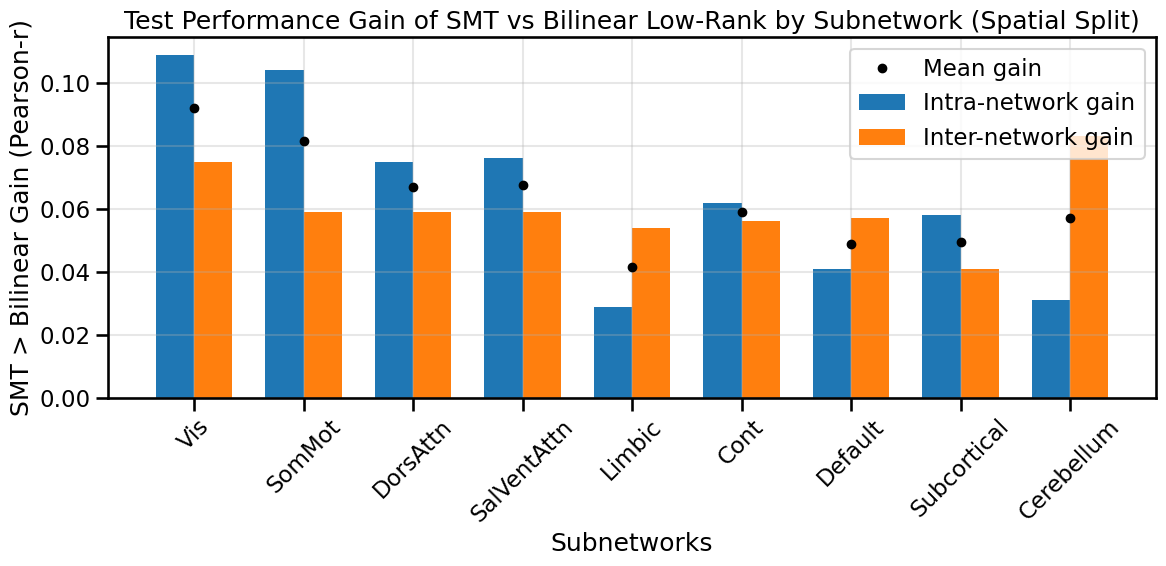

In [12]:
# Extract metrics for shared_transformer and bilinear_lowrank
smt_metrics = subnetwork_metrics_df_spatial.loc['shared_transformer']
blr_metrics = subnetwork_metrics_df_spatial.loc['bilinear_lowrank']

# Calculate gains for each subnetwork
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default', 'Subcortical', 'Cerebellum']
gains = {'Intra': [], 'Inter': []}

for network in networks:
    # Extract values from string format "mean ± std"
    smt_intra = float(smt_metrics[f'{network} Intra'].split('±')[0])
    blr_intra = float(blr_metrics[f'{network} Intra'].split('±')[0])
    smt_inter = float(smt_metrics[f'{network} Inter'].split('±')[0])
    blr_inter = float(blr_metrics[f'{network} Inter'].split('±')[0])
    
    # Calculate gains
    gains['Intra'].append(smt_intra - blr_intra)
    gains['Inter'].append(smt_inter - blr_inter)

# Plot the per-subnetwork gains
plt.figure(figsize=(12, 6))
x = np.arange(len(networks))
width = 0.35

plt.bar(x - width/2, gains['Intra'], width, label='Intra-network gain')
plt.bar(x + width/2, gains['Inter'], width, label='Inter-network gain')

# Calculate and plot mean gains per subnetwork
subnetwork_mean_gains = []
for i in range(len(networks)):
    subnetwork_mean = (gains['Intra'][i] + gains['Inter'][i]) / 2
    subnetwork_mean_gains.append(subnetwork_mean)
    
# Add mean gain points
plt.plot(x, subnetwork_mean_gains, 'ko', markersize=6, label='Mean gain')

plt.xlabel('Subnetworks')
plt.ylabel('SMT > Bilinear Gain (Pearson-r)')
plt.title('Test Performance Gain of SMT vs Bilinear Low-Rank by Subnetwork (Spatial Split)')
plt.xticks(x, networks, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Resorting genes by expression level


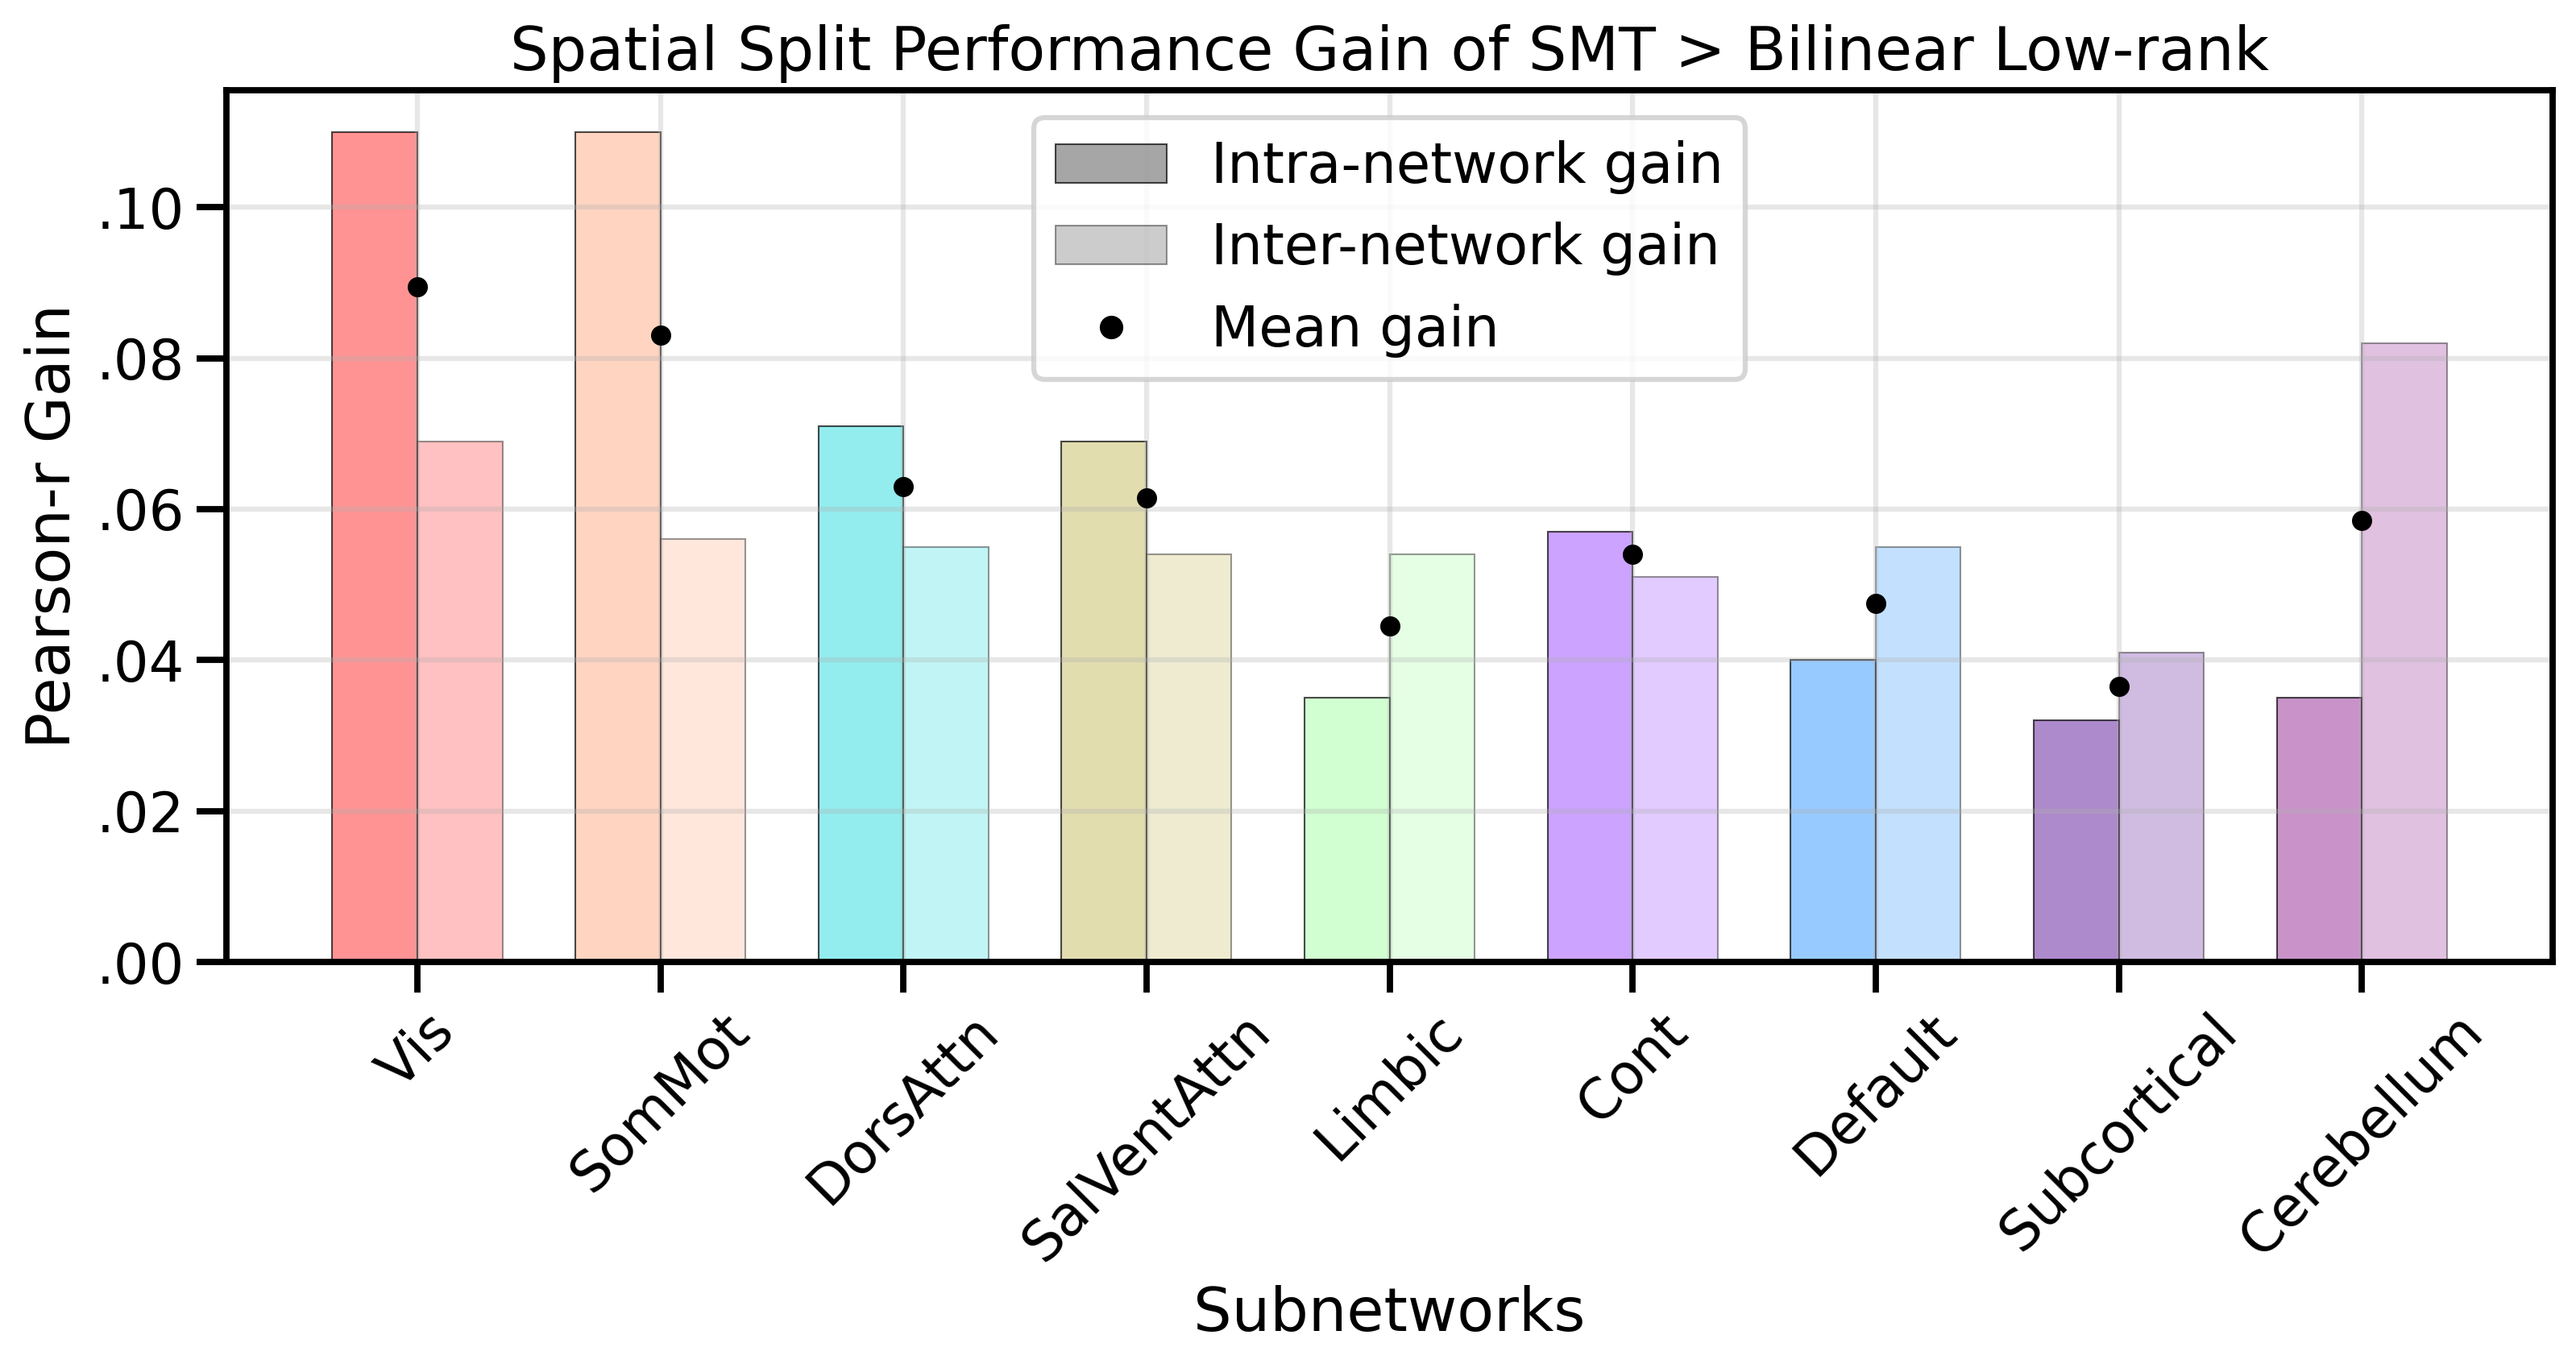

In [13]:
from data.data_load import *

# Load necessary labeled data
X, valid_genes = load_transcriptome(parcellation='S456', gene_list='0.2', hemisphere='both', omit_subcortical=False, sort_genes='expression', impute_strategy='mirror_interpolate', return_valid_genes=True)
labels, network_labels = load_network_labels(parcellation='S456', hemisphere='both', omit_subcortical=False)
valid_indices = ~np.isnan(X).all(axis=1)
X_valid = X[valid_indices]
labels = [labels[i] for i in range(len(labels)) if valid_indices[i]]
network_labels = network_labels[valid_indices]
unique_networks = np.unique(network_labels)

# Create color mapping for networks
colors = plt.cm.rainbow(np.linspace(0.0, 1, len(unique_networks)+1))
network_colors = dict(zip(unique_networks, colors))

def plot_network_gains_colored(subnetwork_metrics_df_spatial, network_colors, use_preloaded_gains=False):
    # Manual color mapping based on image with lighter colors
    network_colors = {
        'Cont': '#B77DFF',      # Lighter purple
        'Default': '#6BB5FF',   # Lighter blue  
        'DorsAttn': '#66E6E8',  # Lighter turquoise
        'Limbic': '#BFFFBF',    # Lighter green
        'SalVentAttn': '#D6CF8D', # Lighter khaki
        'SomMot': '#FFC4A8',    # Lighter salmon
        'Vis': '#FF6666',       # Lighter red
        'Cerebellum': '#B366B3', # Lighter dark purple
        'Subcortical': '#8B58B5' # Lighter indigo
    }

    # Define preloaded gains
    mean_gains = {
        'Vis': 0.088,
        'SomMot': 0.081, 
        'DorsAttn': 0.063,
        'SalVentAttn': 0.061,
        'Limbic': 0.044,
        'Cont': 0.054,
        'Default': 0.047,
        'Subcortical': 0.036,
        'Cerebellum': 0.058
    }

    intra_network_gains = {
        'Vis': 0.11,
        'SomMot': 0.11,
        'DorsAttn': 0.071,
        'SalVentAttn': 0.069,
        'Limbic': 0.035,
        'Cont': 0.057,
        'Default': 0.040,
        'Subcortical': 0.032,
        'Cerebellum': 0.035
    }

    inter_network_gains = {
        'Vis': 0.069,
        'SomMot': 0.056,
        'DorsAttn': 0.055,
        'SalVentAttn': 0.054,
        'Limbic': 0.054,
        'Cont': 0.051,
        'Default': 0.055,
        'Subcortical': 0.041,
        'Cerebellum': 0.082
    }

    networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default', 'Subcortical', 'Cerebellum']
    gains = {'Intra': [], 'Inter': []}

    if use_preloaded_gains:
        # Use preloaded gains from the dictionaries
        gains['Intra'] = [intra_network_gains[network] for network in networks]
        gains['Inter'] = [inter_network_gains[network] for network in networks]
    else:
        # Extract metrics for shared_transformer and bilinear_lowrank
        smt_metrics = subnetwork_metrics_df_spatial.loc['shared_transformer']
        blr_metrics = subnetwork_metrics_df_spatial.loc['bilinear_lowrank']

        for network in networks:
            # Extract values from string format "mean ± std"
            smt_intra = float(smt_metrics[f'{network} Intra'].split('±')[0])
            blr_intra = float(blr_metrics[f'{network} Intra'].split('±')[0])
            smt_inter = float(smt_metrics[f'{network} Inter'].split('±')[0])
            blr_inter = float(blr_metrics[f'{network} Inter'].split('±')[0])
            
            # Calculate gains
            gains['Intra'].append(smt_intra - blr_intra)
            gains['Inter'].append(smt_inter - blr_inter)

    # Plot the per-subnetwork gains
    plt.figure(figsize=(11, 6), dpi=300)  # Increased DPI to 300
    x = np.arange(len(networks))
    width = 0.35

    # Plot bars with network colors and black outline
    for i, network in enumerate(networks):
        plt.bar(x[i] - width/2, gains['Intra'][i], width, color=network_colors[network], 
                alpha=0.7, edgecolor='black', linewidth=0.5)
        plt.bar(x[i] + width/2, gains['Inter'][i], width, color=network_colors[network], 
                alpha=0.4, edgecolor='black', linewidth=0.5)

    # Calculate and plot mean gains per subnetwork
    subnetwork_mean_gains = []
    for i in range(len(networks)):
        subnetwork_mean = (gains['Intra'][i] + gains['Inter'][i]) / 2
        subnetwork_mean_gains.append(subnetwork_mean)
        
    # Add mean gain points
    plt.plot(x, subnetwork_mean_gains, 'ko', markersize=5, label='Mean gain')

    plt.xlabel('Subnetworks')
    plt.ylabel('Pearson-r Gain')
    plt.title('Spatial Split Performance Gain of SMT > Bilinear Low-rank')
    plt.xticks(x, networks, rotation=45)
    
    # Set y-axis ticks at 0.02 intervals and remove leading zeros
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'.lstrip('0')))
    
    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='gray', alpha=0.7, label='Intra-network gain', edgecolor='black', linewidth=0.5),
        Patch(facecolor='gray', alpha=0.4, label='Inter-network gain', edgecolor='black', linewidth=0.5),
        plt.Line2D([0], [0], marker='o', color='k', label='Mean gain', 
                  markerfacecolor='k', markersize=6, linestyle='None')
    ]
    plt.legend(handles=legend_elements)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the function
plot_network_gains_colored(subnetwork_metrics_df_spatial, network_colors, use_preloaded_gains=True)

In [24]:
from data.data_load import *

def plot_network_gains_transposed(subnetwork_metrics_df_spatial, network_colors, use_preloaded_gains=False):
    # Lighter, consistent color map
    network_colors = {
        'Cont': '#B77DFF',      # Lighter purple
        'Default': '#6BB5FF',   # Lighter blue  
        'DorsAttn': '#66E6E8',  # Lighter turquoise
        'Limbic': '#BFFFBF',    # Lighter green
        'SalVentAttn': '#D6CF8D', # Lighter khaki
        'SomMot': '#FFC4A8',    # Lighter salmon
        'Vis': '#FF6666',       # Lighter red
        'Cerebellum': '#B366B3', # Lighter dark purple
        'Subcortical': '#8B58B5' # Lighter indigo
    }
    intra_network_gains = {
        'Vis': 0.11,
        'SomMot': 0.11,
        'DorsAttn': 0.071,
        'SalVentAttn': 0.069,
        'Limbic': 0.035,
        'Cont': 0.057,
        'Default': 0.040,
        'Subcortical': 0.032,
        'Cerebellum': 0.035
    }
    inter_network_gains = {
        'Vis': 0.069,
        'SomMot': 0.056,
        'DorsAttn': 0.055,
        'SalVentAttn': 0.054,
        'Limbic': 0.054,
        'Cont': 0.051,
        'Default': 0.055,
        'Subcortical': 0.041,
        'Cerebellum': 0.082
    }
    # REVERSE ORDER
    networks = ['Cerebellum', 'Subcortical', 'Default', 'Cont', 'Limbic', 'SalVentAttn', 'DorsAttn', 'SomMot', 'Vis']
    gains = {'Intra': [], 'Inter': []}
    if use_preloaded_gains:
        gains['Intra'] = [intra_network_gains[n] for n in networks]
        gains['Inter'] = [inter_network_gains[n] for n in networks]
    else:
        smt_metrics = subnetwork_metrics_df_spatial.loc['shared_transformer']
        blr_metrics = subnetwork_metrics_df_spatial.loc['bilinear_lowrank']
        for network in networks:
            smt_intra = float(smt_metrics[f'{network} Intra'].split('±')[0])
            blr_intra = float(blr_metrics[f'{network} Intra'].split('±')[0])
            smt_inter = float(smt_metrics[f'{network} Inter'].split('±')[0])
            blr_inter = float(blr_metrics[f'{network} Inter'].split('±')[0])
            gains['Intra'].append(smt_intra - blr_intra)
            gains['Inter'].append(smt_inter - blr_inter)

    fig, ax = plt.subplots(figsize=(4, 5.5), dpi=150)
    y = np.arange(len(networks))
    height = 0.43  # Slightly increased bar height

    # SWAP the bar order so INTRA is on top
    bars_intra = ax.barh(
        y + height/2,
        gains['Intra'],
        height=height,
        color=[network_colors[n] for n in networks],
        alpha=0.7,
        edgecolor='black',
        linewidth=0.6,

        label='Intra gain'
    )
    bars_inter = ax.barh(
        y - height/2,
        gains['Inter'],
        height=height,
        color=[network_colors[n] for n in networks],
        alpha=0.4,
        edgecolor='black',
        linewidth=0.6,

        label='Inter gain'
    )

    # Mean gain points - SMALLER, should be above both bars for visibility
    subnetwork_mean_gains = [(gains['Intra'][i] + gains['Inter'][i]) / 2 for i in range(len(networks))]
    ax.plot(
        subnetwork_mean_gains, y, 
        'ko', 
        markersize=4,  # was 3
        zorder=5
    )

    # y-ticks = subnetworks (no label), x-ticks = Pearson gain
    # MOVE y-ticks and y-tick labels from left (ax) to right (ax2)
    ax.set_yticks([])  # Remove y-ticks entirely from left
    ax.set_yticklabels([])  # Remove y-tick labels from left
    ax.set_xlabel('Pearson-r Gain', fontsize=14)  # was 13
    ax.set_ylabel('')
    ax.set_xticks([0.05, 0.10])
    ax.set_xlim(0.03, 0.12)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'.lstrip('0')))
    ax.tick_params(axis='y', labelsize=13, left=False, right=False, length=0)  # was 12
    ax.tick_params(axis='x', labelsize=13)  # was 12

    # Add right-hand side y-axis with ticks/labels
    ax2 = ax.twinx()
    ax2.set_yticks(y)
    ax2.set_yticklabels(networks, fontsize=13)  # was 12
    ax2.tick_params(axis='y', labelsize=13, left=False, right=True)  # was 12
    ax2.set_ylim(ax.get_ylim())  # Sync limits

    # Custom smaller legend in the style of ref code (patches and dot; smaller, compact, edgecolor black)
    legend_elements = [
        Patch(facecolor='gray', alpha=0.7, label='Intra gain', edgecolor='black', linewidth=0.5),
        Patch(facecolor='gray', alpha=0.4, label='Inter gain', edgecolor='black', linewidth=0.5),
        plt.Line2D([0], [0], marker='o', color='k', label='Mean gain', markerfacecolor='k', markersize=6, linestyle='None')  # was 5
    ]
    ax.legend(
        handles=legend_elements,
        loc='center right',
        frameon=True,
        edgecolor='black',
        fontsize=11,  # was 10
        handlelength=1.0,  # was 0.9
        borderpad=0.7,
        labelspacing=0.39  # was 0.35
    )

    # Grid style as in ref code (plt.grid(True, alpha=0.3))
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.7, len(networks)-0.3)
    ax2.set_ylim(ax.get_ylim())
    plt.tight_layout()
    plt.show()


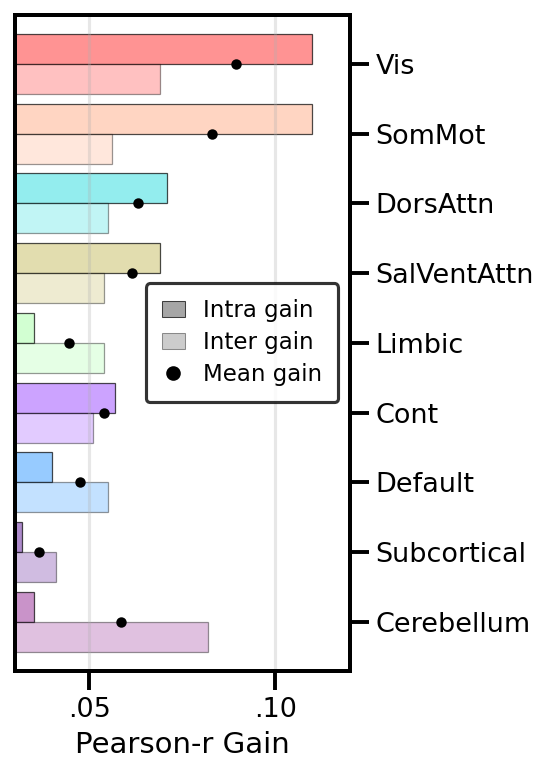

In [25]:
# Call: compact transposed version
plot_network_gains_transposed(subnetwork_metrics_df_spatial, None, use_preloaded_gains=True)

Manually plot gain above null for replication datasets

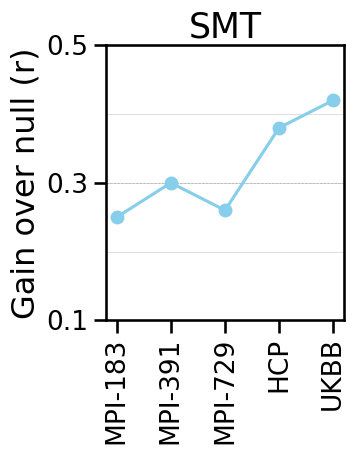

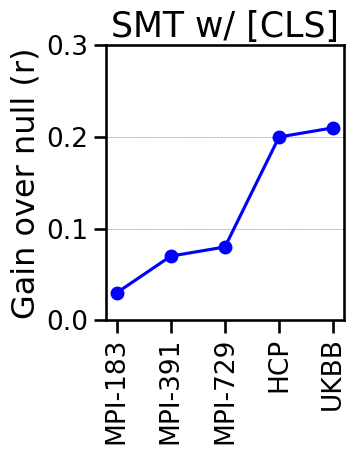

In [64]:
# Data
datasets = ["MPI-183", "MPI-391", "MPI-729", "HCP", "UKBB"]
smt_values = [0.25, 0.3, 0.26, 0.38, 0.42]
smt_cls_values = [0.03, 0.07, 0.08, 0.20, 0.21]

# --- SMT Plot ---
plt.figure(figsize=(4, 5))
plt.plot(datasets, smt_values, marker='o', color='skyblue')

# Define font sizes
ytick_fontsize = 19
xtick_fontsize = 19
ylabel_fontsize = 23
title_fontsize = 25

plt.ylim(0.1, 0.5)                                 # y-axis from 0.1 to 0.5
plt.yticks(np.arange(0.1, 0.51, 0.2), fontsize=ytick_fontsize)  # show y-ticks every 0.2 with consistent font
plt.xticks(rotation=90, fontsize=xtick_fontsize)    # rotate x-axis labels with consistent font

plt.ylabel("Gain over null (r)", fontsize=ylabel_fontsize)
plt.title("SMT", fontsize=title_fontsize)

plt.grid(axis='y', linestyle='--', linewidth=0.5)   # only horizontal lines
plt.grid(axis='x', visible=False)                   # remove vertical gridlines

# Add light horizontal lines every 0.1
for y in np.arange(0.1, 0.51, 0.1):
    plt.axhline(y, color='lightgray', linestyle='-', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

# --- SMT w/ CLS Plot ---
plt.figure(figsize=(4, 5))
plt.plot(datasets, smt_cls_values, marker='o', color='blue')
plt.ylim(0.0, 0.3)                                 # y-axis from 0.0 to 0.3
plt.xticks(rotation=90, fontsize=xtick_fontsize)    # consistent font size and rotation
plt.yticks(np.arange(0.0, 0.31, 0.1), fontsize=ytick_fontsize)  # consistent y-tick font size
plt.ylabel("Gain over null (r)", fontsize=ylabel_fontsize)       # consistent ylabel font
plt.title("SMT w/ [CLS]", fontsize=title_fontsize)                 # consistent title font
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.grid(axis='x', visible=False)

# Add light horizontal lines every 0.1
for y in np.arange(0.0, 0.31, 0.1):
    plt.axhline(y, color='lightgray', linestyle='-', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()
